# EXAMPLE DATASET: Loan Approval Prediction

**Dataset**: [here](https://www.kaggle.com/competitions/playground-series-s4e10)

### Functions & Classes

In [ ]:
# drawing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def CountPlot(df, var):

    '''
    helper function - plots the countplot, wrapped up in the function only to make the final preprocessing code clearer

    '''
    plt.figure(figsize=(14,6))

    loan_status = df[var].value_counts()
    loan_status_plot = sn.countplot(x=var, data=df,order=loan_status.index)
    loan_status_plot.set_title("Counts of", fontsize=25)
    loan_status_plot.set_xlabel("Status", fontsize=15)
    loan_status_plot.set_ylabel("Count", fontsize=15)
    loan_status_plot.set_xticklabels(loan_status.index,rotation=45)
    plt.show()

## Download dataset from Kaggle to Google Colab

### **"Template" code**

```
competition_name = "titanic"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

kaggle_creds_path = "PATH_TO_YOUR_TOKEN"

! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp PATH_TO_YOUR_TOKEN ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

# Unmount your Google Drive
drive.flush_and_unmount()
```



In [ ]:
competition_name = "playground-series-s4e10"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
kaggle_creds_path = "/content/drive/MyDrive/Kaggle/kaggle.json"

In [ ]:
# check working directory
! pwd

/content


In [ ]:
# # changing the working directory
# # run only if you want to change the WD to a folder on google drive and save the results/data/all there
# # otherwise it will be run in memory and will be deleted once the runtime is disconnected
# # (for testing purposes and on-the-job work the latter is better)
# %cd /content/drive/My Drive/Kaggle

In [ ]:
! pwd

/content


In [ ]:
# check contents of the working directory
! ls

drive  sample_data


In [ ]:
#! pip install kaggle

In [ ]:
# # create folder where the data will be dumped
# ! mkdir ~/.kaggle
# ! cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir ~/.kaggle
! cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/

In [ ]:
# download data
! kaggle competitions download -c {competition_name} # the data is being saved down to a working directory

In [ ]:
# folder with data (this is being created in the working directory)
! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

Archive:  playground-series-s4e10.zip
  inflating: kaggle_data/sample_submission.csv  
  inflating: kaggle_data/test.csv    
  inflating: kaggle_data/train.csv   


## "Benchmark" model with the autoML / autoGluon library

**Examples of AutoML Systems**

Throughout recent years several off-the-shelf packages have been developed which provide automated machine learning. We have developed:

AutoWEKA is an approach for the simultaneous selection of a machine learning algorithm and its hyperparameters; combined with the WEKA package it automatically yields good models for a wide variety of data sets.
Auto-sklearn is an extension of AutoWEKA using the Python library scikit-learn which is a drop-in replacement for regular scikit-learn classifiers and regressors.
Auto-PyTorch is based on the deep learning framework PyTorch and jointly optimizes hyperparameters and the neural architecture.
Other’s well-known AutoML packages include:

AutoGluon is a multi-layer stacking approach of diverse ML models.
H2O AutoML provides automated model selection and ensembling for the H2O machine learning and data analytics platform.
MLBoX is an AutoML  library with three components: preprocessing, optimisation and prediction.
TPOT is a data-science assistant which optimizes machine learning pipelines using genetic programming.
TransmogrifAI is an AutoML library running on top of Spark.

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import autogluon as ag
from autogluon.tabular import TabularPredictor

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/sample_submission.csv')

In [ ]:
X = data.drop(['loan_status'], axis = 1)
y = data['loan_status']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.05, stratify = y, random_state = 42)

train_data = pd.concat([X_train, y_train], axis = 1)
valid_data = pd.concat([X_valid, y_valid], axis = 1)


del X, y, X_train, X_valid, y_train, y_valid


### Observations:
*   this is an imbalanced dataset. Introducing the stratification has improved the overall result
*   interestingly optimising over f1 on the train/valid datasets gave better test Kaggle results than roc_auc which gace better results on the valid dataset. Maybe we should always prioritise optimising over f1? - Need to probably check this on a few datasets.



#### Some basic EDA

In [ ]:
train_data.head()

id  person_age  person_income person_home_ownership  \
29528  29528          28          51000                  RENT   
47877  47877          25          84000              MORTGAGE   
19940  19940          27          60000              MORTGAGE   
5835    5835          26          48000                  RENT   
35808  35808          26         390000              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
29528                1.0            VENTURE          D      13000   
47877                0.0    HOMEIMPROVEMENT          B       5000   
19940                7.0            VENTURE          B       2500   
5835                 4.0  DEBTCONSOLIDATION          C      11200   
35808                6.0    HOMEIMPROVEMENT          C       6000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
29528          16.89                 0.25                         Y   
47877          12.18                 0.06                         N   
19940          11.14                 0.04                         N   
5835           14.26                 0.23                         Y   
35808          14.17                 0.15                         Y   

       cb_person_cred_hist_length  loan_status  
29528                          10            1  
47877                           4            0  
19940                           6            0  
5835                            2            0  
35808                           4            0

In [ ]:
train_data.describe()

id    person_age  person_income  person_emp_length  \
count  55712.000000  55712.000000   5.571200e+04       55712.000000   
mean   29324.806810     27.548499   6.401682e+04           4.696080   
std    16926.888726      6.037926   3.815470e+04           3.962425   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14682.750000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43979.250000     30.000000   7.534975e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  55712.000000   55712.000000         55712.000000   
mean    9209.901404      10.677887             0.159265   
std     5558.088904       3.037816             0.091826   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                55712.000000  55712.000000  
mean                     5.811692      0.142375  
std                      4.028567      0.349438  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55712 entries, 29528 to 22774
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          55712 non-null  int64  
 1   person_age                  55712 non-null  int64  
 2   person_income               55712 non-null  int64  
 3   person_home_ownership       55712 non-null  object 
 4   person_emp_length           55712 non-null  float64
 5   loan_intent                 55712 non-null  object 
 6   loan_grade                  55712 non-null  object 
 7   loan_amnt                   55712 non-null  int64  
 8   loan_int_rate               55712 non-null  float64
 9   loan_percent_income         55712 non-null  float64
 10  cb_person_default_on_file   55712 non-null  object 
 11  cb_person_cred_hist_length  55712 non-null  int64  
 12  loan_status                 55712 non-null  int64  
dtypes: float64(3), int64(6), object(

In [ ]:
label = 'loan_status'
train_data[label].value_counts()

loan_status
0    47780
1     7932
Name: count, dtype: int64

In [ ]:
#CountPlot(df=train_data, var='loan_status')

<Axes: >

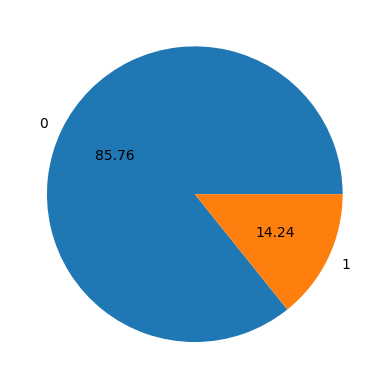

In [ ]:
train_data.groupby(label).size().plot(kind='pie', autopct='%.2f')

In [ ]:
param_list = ['f1', 'roc_auc', 'accuracy'] #, 'roc_auc' 'accuracy'
param_path = ['AutogluonModels/ag_']*len(param_list)
param_path = [i + j for i, j in zip(param_path, param_list)]
param_input = dict(zip(param_list, param_path))

In [ ]:
param_input

{'f1': 'AutogluonModels/ag_f1',
 'roc_auc': 'AutogluonModels/ag_roc_auc',
 'accuracy': 'AutogluonModels/ag_accuracy'}

In [ ]:
assessment_metric = 'roc_auc'

In [ ]:
import time
from datetime import datetime

In [ ]:
def calculate_time(wrapper_function):
  # if fnction can take any arguments, it can be added as these *args, **kwards
  def inner_fctn(*args, **kwargs):
    begin = time.time()
    print("Function set off @: ", datetime.now())
    wrapper_function(*args, **kwargs)
    end = time.time()
    print("Total time taken in: ", wrapper_function.__name__, (end-begin)/(60), "minutes")

  return wrapper_function

In [ ]:
for param, path in param_input.items():
  print(param)

f1
roc_auc
accuracy


In [ ]:
@calculate_time # we are decorating the optimise_autogluon function here
def optimise_autogluon(param_input, assessment_metric):

  '''
  this function takes approx. 23 minutes to calculate
  '''
  models_df_summary = pd.DataFrame(index=
      ['roc_auc',
        'accuracy',
        'balanced_accuracy',
        'mcc',
        'f1',
        'precision',
        'recall'])


  leaderboard_all_models = pd.DataFrame(columns=
      ['model',
       'score_test',
       'score_val',
       'eval_metric'])

  for param, path in param_input.items(): #iterating over a dictionary
    predictor = TabularPredictor(label=label, eval_metric = param, path=path, verbosity=0).fit(train_data=train_data)
    leaderboard_3best = pd.DataFrame(predictor.leaderboard(valid_data).iloc[0:3])[['model', 'score_test', 'score_val', 'eval_metric']]
    #pd.DataFrame(predictor.leaderboard(valid_data).iloc[0]).reset_index().rename(columns={0: param})
    best_predict = predictor.evaluate(valid_data)
    best_predict = pd.DataFrame.from_dict(best_predict, orient='index').rename(columns={0: param})
    models_df_summary = pd.concat([models_df_summary, best_predict], axis=1, join="inner")
    leaderboard_all_models = pd.concat([leaderboard_all_models, leaderboard_3best], ignore_index=True, sort=False)

  best_metric = models_df_summary[assessment_metric].idxmax()
  best_predict_out = best_predict._get_value(assessment_metric, param)
  print(best_metric)

  return best_metric, leaderboard_all_models

#TODO:
  ## why decorator does not work??
  # maybe amend the code to save in the folder on google drive (extract) the best models
  # in general the models are being saved in the folder (that's and example path): AutogluonModels/ag_roc_auc/models/WeightedEnsemble_L2 --> model .pkl



In [ ]:
best_metric, models_to_investigate = optimise_autogluon(param_input=param_input, assessment_metric=assessment_metric)
# this function takes approx. ______ to run

<ipython-input-16-b1cf37c64c33>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leaderboard_all_models = pd.concat([leaderboard_all_models, leaderboard_3best], ignore_index=True, sort=False)


roc_auc


In [ ]:
best_metric

'roc_auc'

In [ ]:
models_to_investigate
# TODO score this by score_eval within each eval_metric group

model  score_test  score_val eval_metric
0             CatBoost    0.813559   0.819723          f1
1  WeightedEnsemble_L2    0.813072   0.826421          f1
2             LightGBM    0.811245   0.811912          f1
3  WeightedEnsemble_L2    0.954169   0.969456     roc_auc
4        LightGBMLarge    0.954044   0.966279     roc_auc
5             CatBoost    0.953245   0.965912     roc_auc
6              XGBoost    0.952949   0.951600    accuracy
7             CatBoost    0.951926   0.952800    accuracy
8     RandomForestEntr    0.951244   0.951600    accuracy

In [ ]:
 predictor = TabularPredictor.load(param_input[best_metric])

 # predictor = TabularPredictor.load('AutogluonModels/ag_f1')


In [ ]:
 ## TODO: write a function that "tunes" the eval_metric & other "parameter inputs" to autogluon / other autoML functions
 # DONE !!!

 # Add time (by use of decorator) to know how much time it takes to run DONE!

In [ ]:
fit_summary_table = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.969456     roc_auc       0.270862  218.917301                0.000983           0.179165            2       True         14
1               XGBoost   0.966553     roc_auc       0.066261    5.568395                0.066261           5.568395            1       True         11
2         LightGBMLarge   0.966279     roc_auc       0.116105    4.616856                0.116105           4.616856            1       True         13
3              CatBoost   0.965912     roc_auc       0.014457  205.480399                0.014457         205.480399            1       True          7
4              LightGBM   0.964614     roc_auc       0.073056    3.072486                0.073056           3.072486            1       True          4
5            LightGBMXT   

In [ ]:
fit_summary_table

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7973453483984572,
  'KNeighborsDist': 0.7994776381435518,
  'LightGBMXT': 0.9485381204930405,
  'LightGBM': 0.9646138164514506,
  'RandomForestGini': 0.9456544524568171,
  'RandomForestEntr': 0.9475240545866175,
  'CatBoost': 0.9659121876572195,
  'ExtraTreesGini': 0.9288149316619152,
  'ExtraTreesEntr': 0.9328259946754989,
  'NeuralNetFastAI': 0.9371567373805132,
  'XGBoost': 0.9665528572027504,
  'NeuralNetTorch': 0.9372222455140031,
  'LightGBMLarge': 

In [ ]:
# max_stack_level - Maximum Stacking Level?? here maybe some explanation https://www.researchgate.net/figure/General-layout-for-container-cluster-and-stack_fig1_265490856

In [ ]:
best_model = fit_summary_table['model_best']
best_model

'WeightedEnsemble_L2'

In [ ]:
fit_summary_table['model_hyperparams'][best_model]

{'use_orig_features': False,
 'valid_stacker': True,
 'max_base_models': 0,
 'max_base_models_per_type': 'auto',
 'save_bag_folds': True}

In [ ]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [ ]:
import graphviz

In [ ]:
predictor.plot_ensemble_model()

'/content/AutogluonModels/ag_roc_auc/ensemble_model.png'

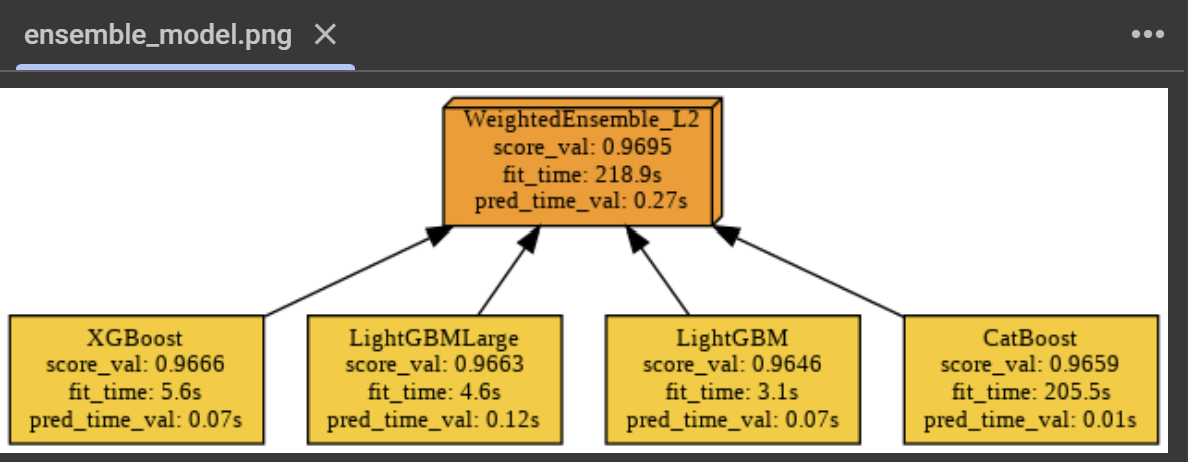

In [ ]:
predictor.leaderboard(valid_data)
# gdyby najlepszym modelem accuracy (in terms of roc) - we need to take the best model out of accuracy leaderboard (amend this)
# here not an issue because roc_auc chosen
# TODO
# build a 'best models' from scratch - i.e. replicate the best model

model  score_test  score_val eval_metric  pred_time_test  \
0   WeightedEnsemble_L2    0.954169   0.969456     roc_auc        0.420761   
1         LightGBMLarge    0.954044   0.966279     roc_auc        0.182798   
2              CatBoost    0.953245   0.965912     roc_auc        0.025317   
3              LightGBM    0.953009   0.964614     roc_auc        0.098647   
4               XGBoost    0.947975   0.966553     roc_auc        0.109405   
5            LightGBMXT    0.939634   0.948538     roc_auc        0.451487   
6      RandomForestEntr    0.934586   0.947524     roc_auc        0.303692   
7       NeuralNetFastAI    0.933736   0.937157     roc_auc        0.115731   
8        NeuralNetTorch    0.933373   0.937222     roc_auc        0.039838   
9      RandomForestGini    0.932207   0.945654     roc_auc        0.329659   
10       ExtraTreesEntr    0.925005   0.932826     roc_auc        0.605590   
11       ExtraTreesGini    0.920923   0.928815     roc_auc        0.480330   
12       KNeighborsDist    0.771916   0.799478     roc_auc        0.039334   
13       KNeighborsUnif    0.771434   0.797345     roc_auc        0.062781   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        0.270862  218.917301                 0.004594   
1        0.116105    4.616856                 0.182798   
2        0.014457  205.480399                 0.025317   
3        0.073056    3.072486                 0.098647   
4        0.066261    5.568395                 0.109405   
5        0.313982    7.979252                 0.451487   
6        0.170282   29.192755                 0.303692   
7        0.058378   74.633527                 0.115731   
8        0.041682  140.347530                 0.039838   
9        0.183100   25.914723                 0.329659   
10       0.372856   10.623122                 0.605590   
11       0.379428   10.098327                 0.480330   
12       0.046622    0.151124                 0.039334   
13       0.056326    0.153291                 0.062781   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000983           0.179165            2       True   
1                 0.116105           4.616856            1       True   
2                 0.014457         205.480399            1       True   
3                 0.073056           3.072486            1       True   
4                 0.066261           5.568395            1       True   
5                 0.313982           7.979252            1       True   
6                 0.170282          29.192755            1       True   
7                 0.058378          74.633527            1       True   
8                 0.041682         140.347530            1       True   
9                 0.183100          25.914723            1       True   
10                0.372856          10.623122            1       True   
11                0.379428          10.098327            1       True   
12                0.046622           0.151124            1       True   
13                0.056326           0.153291            1       True   

    fit_order  
0          14  
1          13  
2           7  
3           4  
4          11  
5           3  
6           6  
7          10  
8          12  
9           5  
10          9  
11          8  
12          2  
13          1

In [ ]:
performance = predictor.evaluate(valid_data)

In [ ]:
performance

{'roc_auc': 0.9541687673005033,
 'accuracy': 0.9526082509376066,
 'balanced_accuracy': 0.8576688196181761,
 'mcc': 0.7945242017933117,
 'f1': 0.8134228187919463,
 'precision': 0.926605504587156,
 'recall': 0.7248803827751196}

### Output

In [ ]:
# create a dictionary containing all csv. of sumbission files of all models (potentially json)

### Function to make several Kaggle submissions at the same time.
- loads iteratively all of the models in the AutoGluon Folder and submist results for each of them

```
import os

def submit_several_kaggle(competition_name = "playground-series-s4e10"):
    all_models = os.listdir("AutogluonModels/")

    for model in all_models:

      path = 'AutogluonModels/'+model
      predictor = TabularPredictor.load(path)
      sample_submission[label]= predictor.predict(test_data)

      # save as csv
      sample_submission.to_csv("my_submission.csv", index=False, header=True)
      time.sleep(2)
      tstamp = print("\n", model, datetime.now())
      # submit the file to kaggle
      !kaggle competitions submit {competition_name} -f my_submission.csv -m "submission_1"

    return tstamp


submit_several_kaggle(competition_name = "playground-series-s4e10")
```

Output:

```
 ag_accuracy 2024-11-05 13:15:50.429777
100% 305k/305k [00:01<00:00, 266kB/s]
Successfully submitted to Loan Approval Prediction
 ag_roc_auc 2024-11-05 13:15:56.593285
100% 305k/305k [00:01<00:00, 257kB/s]
Successfully submitted to Loan Approval Prediction
 ag_f1 2024-11-05 13:16:04.067916
100% 305k/305k [00:01<00:00, 261kB/s]
Successfully submitted to Loan Approval Prediction

```

In [ ]:
import os

def submit_several_kaggle(competition_name = competition_name):
    all_models = os.listdir("AutogluonModels/")

    for model in all_models:

      path = 'AutogluonModels/'+model
      predictor = TabularPredictor.load(path)
      sample_submission[label]= predictor.predict(test_data)

      # save as csv
      sample_submission.to_csv("my_submission.csv", index=False, header=True)
      time.sleep(2)
      tstamp = print("\n", model, datetime.now())
      # submit the file to kaggle
      !kaggle competitions submit {competition_name} -f my_submission.csv -m "submission_1"

    return tstamp


competition_name="playground-series-s4e10"

In [ ]:
submit_several_kaggle(competition_name = "playground-series-s4e10")

In [ ]:
# View results
!kaggle competitions submissions -c {competition_name}

### Submitting results to Kaggle

In [ ]:
# creating submission
sample_submission[label]= predictor.predict(test_data)
sample_submission[label].value_counts()

In [ ]:
# save as csv
sample_submission.to_csv("my_submission.csv", index=False, header=True)

In [ ]:
competition_name = "playground-series-s4e10"

In [ ]:
# submit the file to kaggle
!kaggle competitions submit {competition_name} -f my_submission.csv -m "submission_1"

In [ ]:
# View results
!kaggle competitions submissions -c {competition_name}

In [ ]:
# # Full code for future use (can upload to github for the future and run as .py code script)
# sample_submission[label]= predictor.predict(test_data)
# sample_submission[label].value_counts()
# # save as csv
# sample_submission.to_csv("my_submission.csv", index=False, header=True)
# competition_name = "playground-series-s4e10"
# # submit the file to kaggle
# !kaggle competitions submit {competition_name} -f my_submission.csv -m "submission_1"
# # View results
# !kaggle competitions submissions -c {competition_name}


### Note on public and private scores:

Generally in Machine Learning, you want to perform well on completely unseen data, for example data that does not exist yet. To simulate this in a competition, it is important that you do not have any interaction with this (private) data, which is why the **private scores are published after the competition**. This is because you can actually learn a lot from your public scores during a competition, and use that knowledge to overfit your solution to this public test set.

In [ ]:
# Generally in Machine Learning, you want to perform well on completely unseen data, for example data that does not exist yet. To simulate this in a competition, it is important that you do not have any interaction with this (private) data, which is why the private scores are published after the competition. This is because you can actually learn a lot from your public scores during a competition, and use that knowledge to overfit your solution to this public test set.

### Kaggle Results Summary
Optimising wrt to the metrics gave the following Kaggle results:
- accuracy: 0.86407
- f1: 0.87106
- roc_auc: 0.86737

In [ ]:
# # NEXT STEPS:
# * proper EDA (maybe automatise reports)
# * some model (XGBoost, Random Forest) & then bagging and stacking
# * read on models in the book
# * models that autogluon deems best

In [ ]:
# Autogluon to investigate:

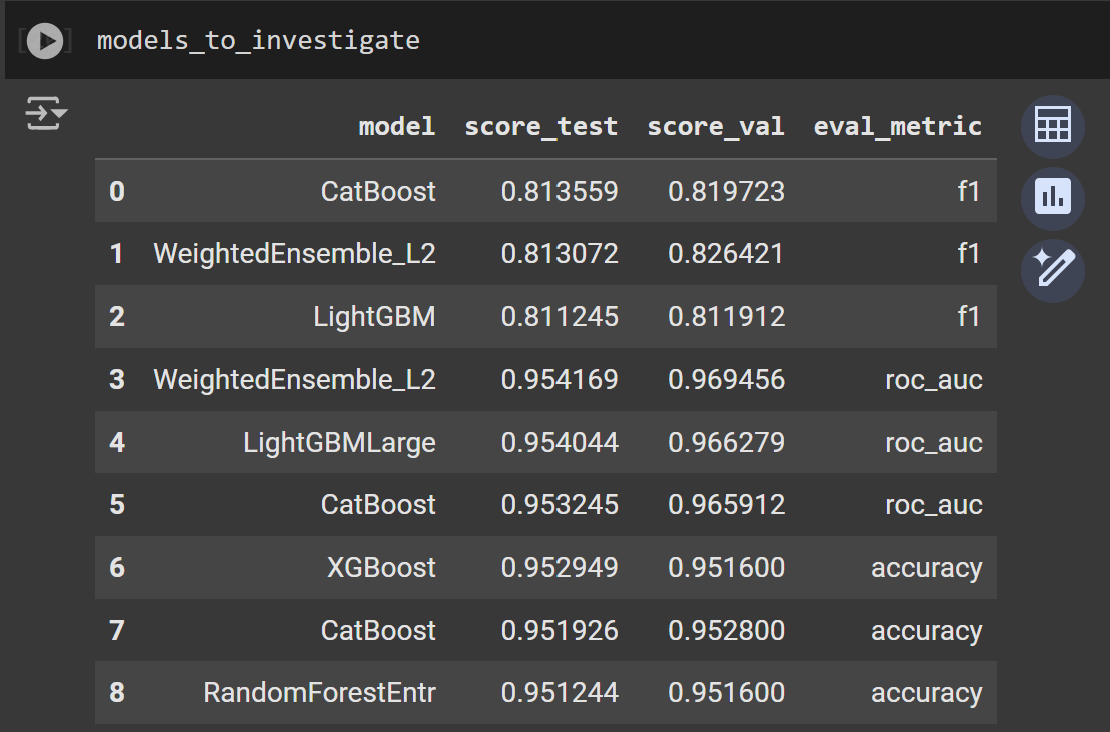


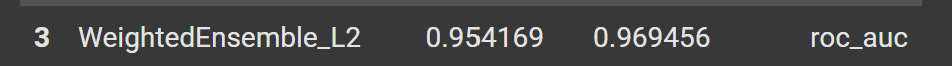

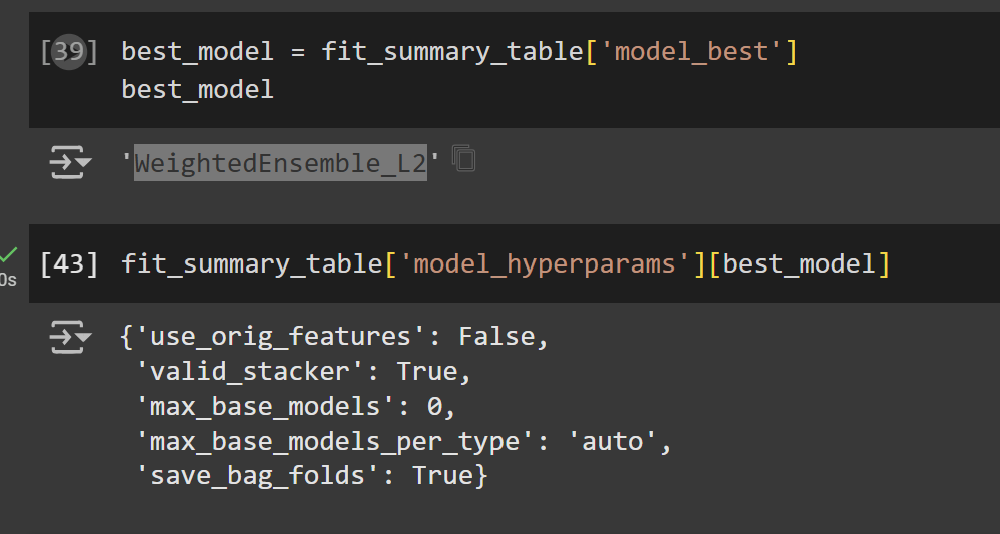

In [ ]:
# The below are what the WeightedEnsemble model is IN CASE OF THIS MODELLING task:

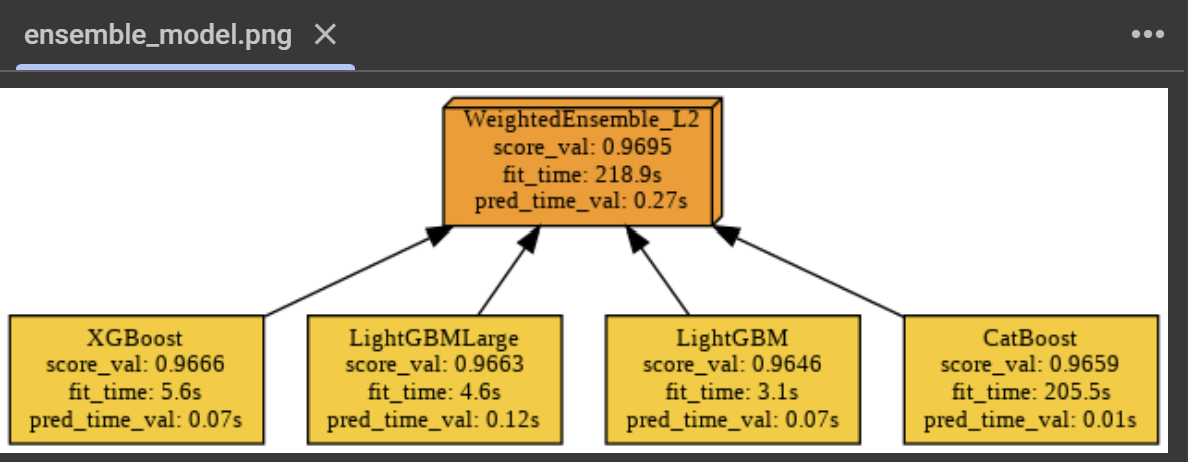

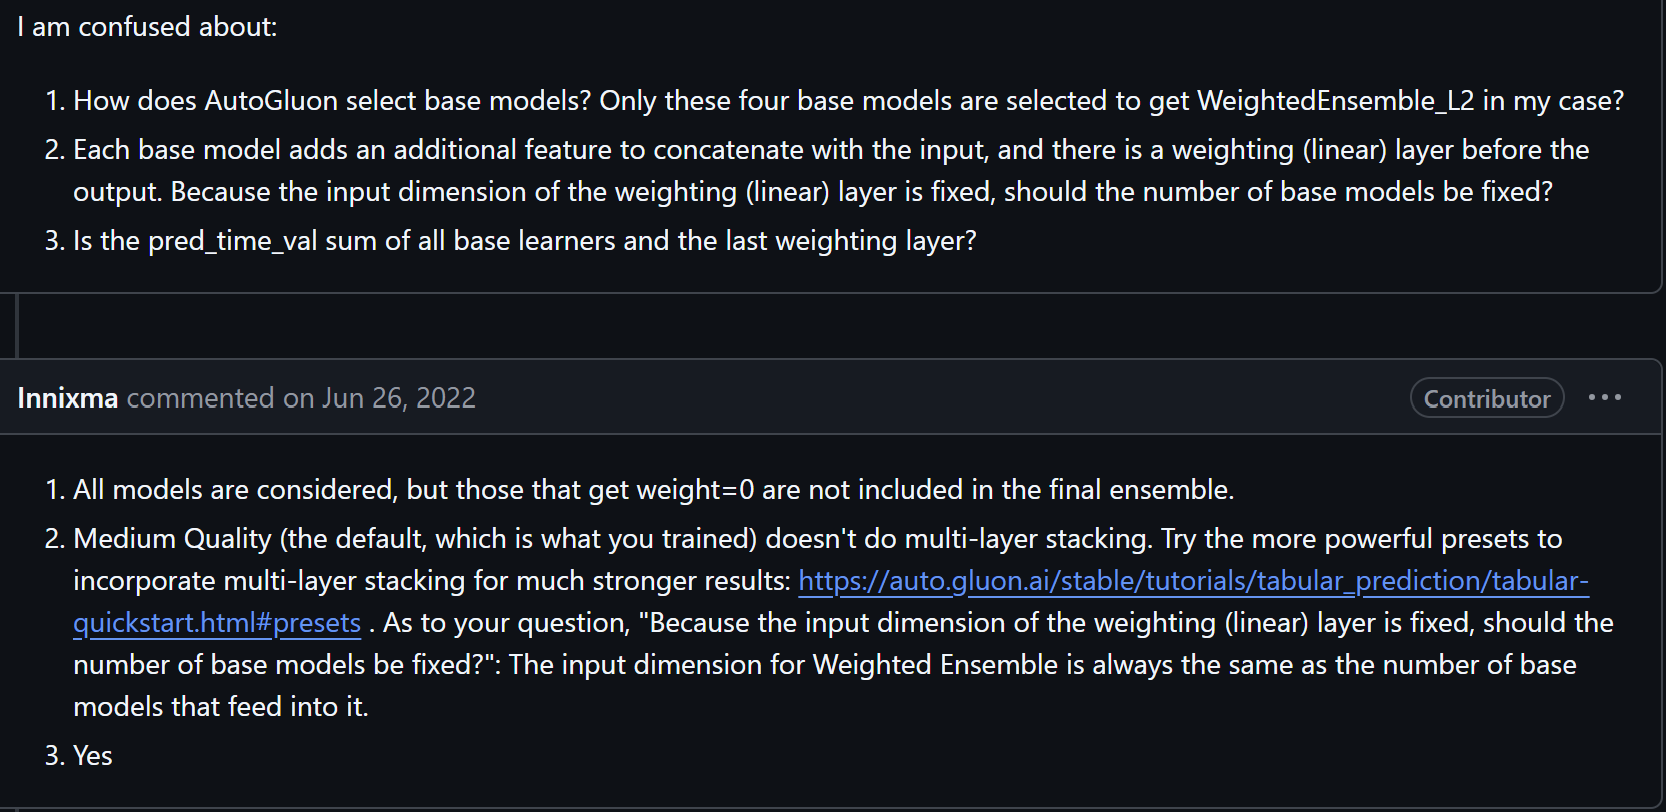

In [ ]:
train_data.head()

id  person_age  person_income person_home_ownership  \
29528  29528          28          51000                  RENT   
47877  47877          25          84000              MORTGAGE   
19940  19940          27          60000              MORTGAGE   
5835    5835          26          48000                  RENT   
35808  35808          26         390000              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
29528                1.0            VENTURE          D      13000   
47877                0.0    HOMEIMPROVEMENT          B       5000   
19940                7.0            VENTURE          B       2500   
5835                 4.0  DEBTCONSOLIDATION          C      11200   
35808                6.0    HOMEIMPROVEMENT          C       6000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
29528          16.89                 0.25                         Y   
47877          12.18                 0.06                         N   
19940          11.14                 0.04                         N   
5835           14.26                 0.23                         Y   
35808          14.17                 0.15                         Y   

       cb_person_cred_hist_length  loan_status  
29528                          10            1  
47877                           4            0  
19940                           6            0  
5835                            2            0  
35808                           4            0

In [ ]:
train_data.describe()

id    person_age  person_income  person_emp_length  \
count  55712.000000  55712.000000   5.571200e+04       55712.000000   
mean   29324.806810     27.548499   6.401682e+04           4.696080   
std    16926.888726      6.037926   3.815470e+04           3.962425   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14682.750000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43979.250000     30.000000   7.534975e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  55712.000000   55712.000000         55712.000000   
mean    9209.901404      10.677887             0.159265   
std     5558.088904       3.037816             0.091826   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                55712.000000  55712.000000  
mean                     5.811692      0.142375  
std                      4.028567      0.349438  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [ ]:
label = 'loan_status'
train_data[label].value_counts()

loan_status
0    47780
1     7932
Name: count, dtype: int64

<Axes: >

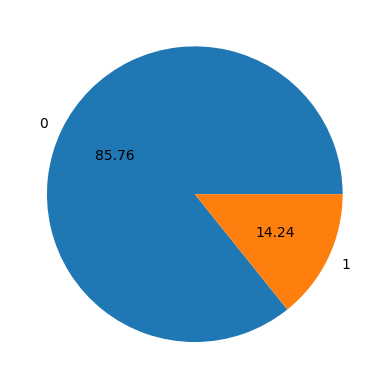

In [ ]:
train_data.groupby(label).size().plot(kind='pie', autopct='%.2f')

In [ ]:
col = 'person_age'
train_data[col].value_counts()

person_age
23     7375
22     6708
24     6051
25     4811
27     4216
26     3669
28     3512
29     3126
30     2213
31     1829
21     1707
32     1492
33     1251
36     1059
34      985
37      933
35      805
38      708
39      510
40      417
41      409
43      301
42      275
44      217
46      157
45      154
47      120
48       94
53       73
51       62
50       61
54       60
49       57
52       57
55       32
58       32
60       28
56       27
57       23
65       13
61       13
20       12
66       11
64       10
70       10
62        7
59        6
69        6
73        3
80        2
123       1
84        1
76        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

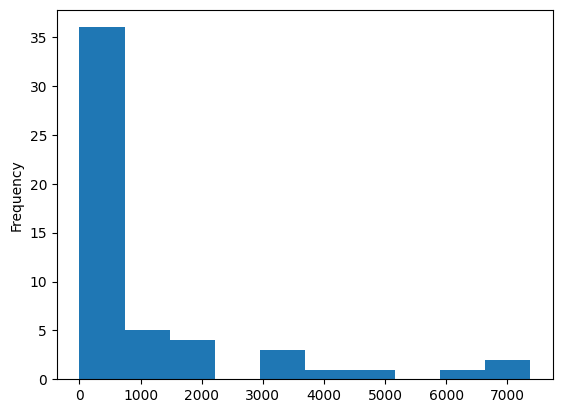

In [ ]:
train_data.groupby(col).size().plot(kind='hist')

In [ ]:
train_data.shape

(55712, 13)

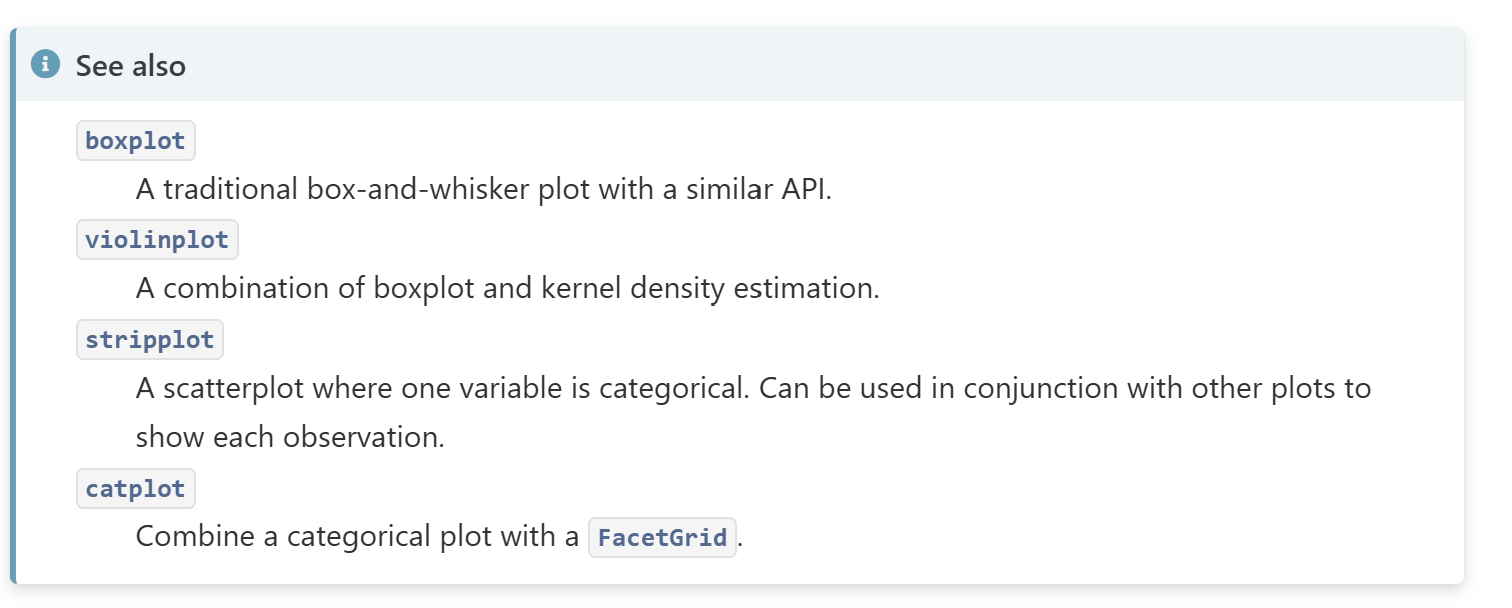

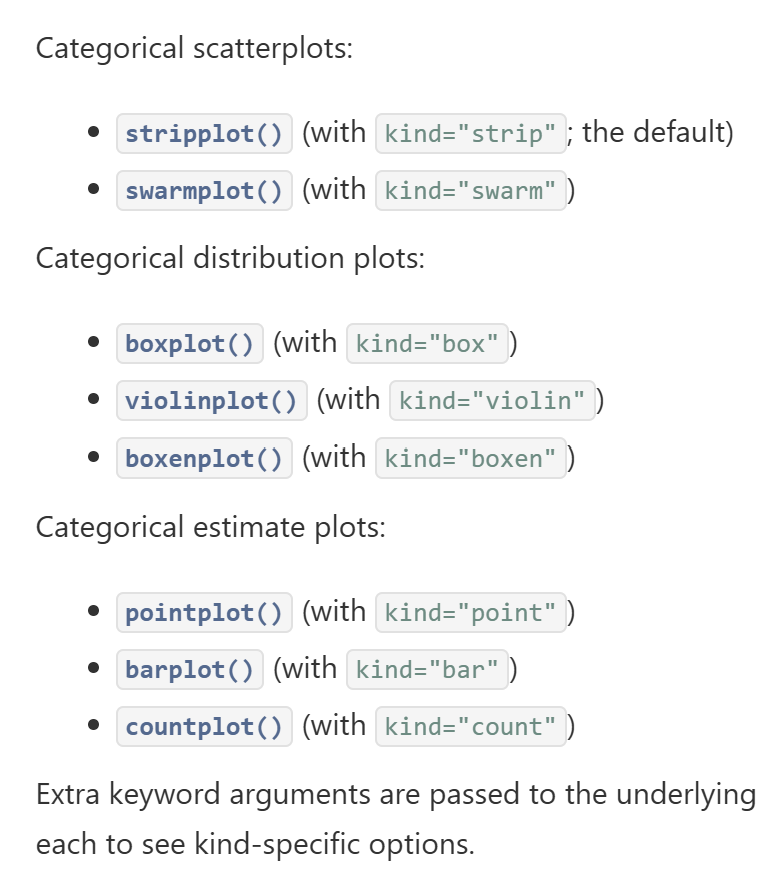

In [ ]:
train_data.columns.tolist()

['id',
 'person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'loan_status']

In [ ]:
# identifying columns which have different values and so are useless for prediction:

colnames_drop=[]

for col in train_data.columns.tolist():
  if len(set(train_data[col])) == len(train_data[col]):
    colnames_drop.append(col)
  else: pass

### Before EDA CLEAN the dataset - i.e. identify and decide what to do with missing values, outliers, data issues - for example mistakes in text data etc.

In [ ]:
# TODO:
# investigate if there are any missing values in this dataset (I think not)
# ourliers - definitely - there is an outlier in the ages data (age 120... likely not)

In [ ]:
colnames_drop

['id']

In [ ]:
train_data.drop(colnames_drop, axis=1, inplace=True)

In [ ]:
train_data

person_age  person_income person_home_ownership  person_emp_length  \
29528          28          51000                  RENT                1.0   
47877          25          84000              MORTGAGE                0.0   
19940          27          60000              MORTGAGE                7.0   
5835           26          48000                  RENT                4.0   
35808          26         390000              MORTGAGE                6.0   
...           ...            ...                   ...                ...   
44397          21          24000              MORTGAGE                5.0   
38830          31          42500                  RENT               15.0   
8888           31          65000              MORTGAGE                2.0   
54977          49         120000                  RENT               11.0   
22774          29          48000                  RENT               13.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
29528            VENTURE          D      13000          16.89   
47877    HOMEIMPROVEMENT          B       5000          12.18   
19940            VENTURE          B       2500          11.14   
5835   DEBTCONSOLIDATION          C      11200          14.26   
35808    HOMEIMPROVEMENT          C       6000          14.17   
...                  ...        ...        ...            ...   
44397          EDUCATION          C       5000          14.72   
38830          EDUCATION          D       8000          16.29   
8888             MEDICAL          B      10000          11.36   
54977          EDUCATION          B      12000          12.69   
22774            MEDICAL          B       3500          12.69   

       loan_percent_income cb_person_default_on_file  \
29528                 0.25                         Y   
47877                 0.06                         N   
19940                 0.04                         N   
5835                  0.23                         Y   
35808                 0.15                         Y   
...                    ...                       ...   
44397                 0.21                         Y   
38830                 0.19                         N   
8888                  0.15                         N   
54977                 0.10                         N   
22774                 0.07                         N   

       cb_person_cred_hist_length  loan_status  
29528                          10            1  
47877                           4            0  
19940                           6            0  
5835                            2            0  
35808                           4            0  
...                           ...          ...  
44397                           2            0  
38830                           6            0  
8888                            9            0  
54977                          15            0  
22774                           5            0  

[55712 rows x 12 columns]

In [ ]:
# there might be dependencies between variables which are nonlinear (if nonlinear, then the correlation matrix is not the best choice for recommendation)

In [ ]:

# use numerical variables for producing the pair plots and numerical ones for colouring

In [ ]:
# FEATURE ENGINEERING - try logarithms, square roots, growths etc. , tez log10, log applied mostly to right-skewed variables

<Axes: ylabel='person_age'>

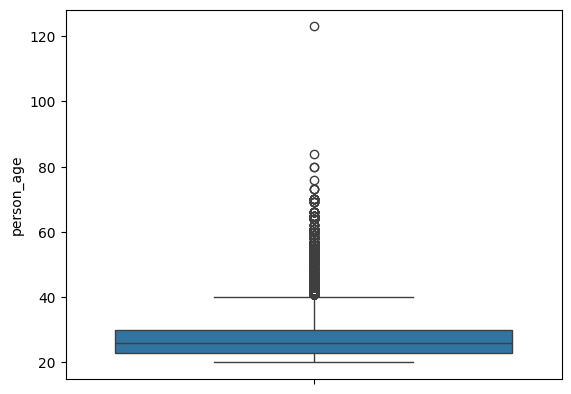

In [ ]:
sns.boxplot(data=train_data, y="person_age")

In [ ]:
# univariate
# dependencies with the response
# variable selection (optional - the algorithm should do it by itself)
# missing values
# identification of outliers

# **My Modelling**

## Tree Based Models

### Advantages:
- can deal with data of any type, hence I do not perform converting categorical values to numerical


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.stats as ss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/sample_submission.csv')

In [ ]:
X = train.drop(['loan_status'], axis = 1)
y = train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, stratify = y, random_state = 42)

df = pd.concat([X_train, y_train], axis = 1)
df_t = pd.concat([X_test, y_test], axis = 1)


#del X, y, X_train, X_test, y_train, y_test


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.05, stratify = y_train, random_state = 42)

train_data = pd.concat([X_train, y_train], axis = 1)
valid_data = pd.concat([X_valid, y_valid], axis = 1)


#del X, y

In [ ]:
# specifying which columns are categorical for the tree algorithms to properly detect them
cat_attribs = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
X_train[cat_attribs] = X_train[cat_attribs].astype('category')
X_valid[cat_attribs] = X_valid[cat_attribs].astype('category')
X_test[cat_attribs] = X_test[cat_attribs].astype('category')
test_data[cat_attribs] = test_data[cat_attribs].astype('category')


In [ ]:
X_train = X_train[object_cols + numerical_cols]
X_valid = X_valid[object_cols + numerical_cols]
X_test = X_test[object_cols + numerical_cols]

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed) # parametr dla losowej cross-validation

#StratifiedKFold - wyprobowac!! dobre dla imbalanced classes


weight_scale_pos = np.sum([y_train==0])/y_train.shape[0]*100 # wagi dla klas scale_pos_weight (ratio of negative class to positive)

## ADD MORE MODELS TO THE PIPELINE HERE
models = Pipeline([("model",XGBClassifier(objective='binary:logistic',
                                         silent=True,
                                         njobs=2,
                                          scale_pos_weight = weight_scale_pos,
                                          enable_categorical=True
                                         ))]) # pipeline dla modelu



"""
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
      n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
"""

param_grids = {
    'model__n_estimators':ss.randint(10,300),
    'model__learning_rate':ss.uniform(0.01,0.3),
    #'model_reg_lambda':ss.uniform(0.1,3),
    'model__min_child_weight': ss.randint(5,50),
    'model__gamma': ss.uniform(0.1,3),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': ss.randint(5,30),
    #'model__scale_pos_weight': [weight_scale_pos]#, 0.9, 0.7, 0.5]
       } # parametry, które hyper-tuningujemy / optymalizujemy


predictor = RandomizedSearchCV(models, param_grids, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=2)


predictor.fit(X_train, y_train)
print(roc_auc_score(predictor.best_estimator_.predict(X_valid),y_valid),
        predictor.best_params_) # zwraca najwyzsza srednia "poprawność" modelu i parametryuj

AttributeError: 'NoneType' object has no attribute 'randint'

In [ ]:
# # Open saved model, and directly make the prediction with new data
# with open('./'+filename4 ,'rb') as f:
#     grid_2w = pickle.load(f)

In [ ]:
y_prediction = predictor.best_estimator_.predict(X_test) # predykcja uzywajac modelu

In [ ]:
roc_auc_score(y_test, y_prediction)

np.float64(0.8708043604402295)

In [ ]:
def ConfusionMtx_Report2(model, X_val_pad, y_val_cat):

    y_pred = model.predict(X_val_pad)
    nb_classes = len(set(y_val_cat))

    print("-------------------")
    print("Number of 'true' values in each class:")
    for i in range(nb_classes):
        print(i, confusion_matrix(y_val_cat, y_pred)[i].sum())

    print("-------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val_cat, y_pred).T
    print(cm)

    print("-------------------")
    # Visualizing of confusion matrix
    df_cm = pd.DataFrame(cm, range(nb_classes), range(nb_classes))
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=False, cmap = "Blues")
    sns.set_context("poster")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")

    fig, axes = plt.subplots(figsize=(10,7))
    cm2 = cm
    cm2 = cm2.astype('float')/cm2.sum(axis=0)
    ax = sns.heatmap(cm2, annot=True, cmap='Blues');
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    plt.title("Confusion Matrix - Normalised")
    ax.axis('equal')
    plt.show()

-------------------
Number of 'true' values in each class:
0 2515
1 418
-------------------
Confusion Matrix:
[[2172   51]
 [ 343  367]]
-------------------


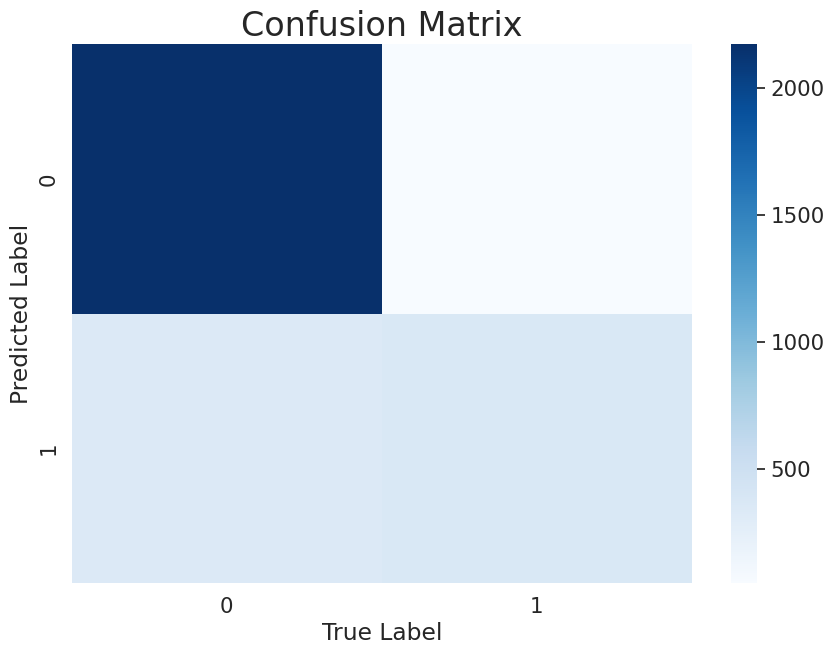

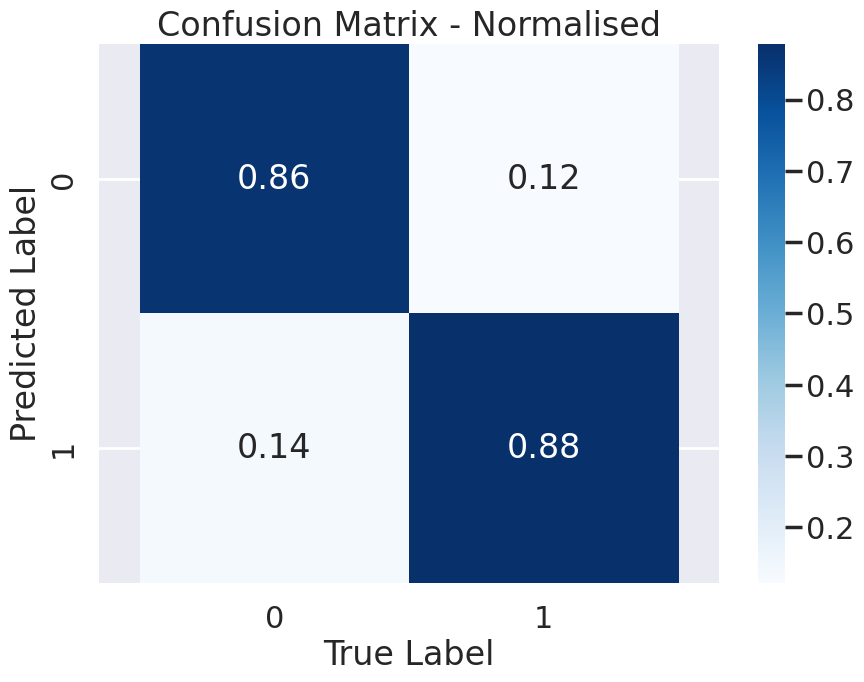

In [ ]:
ConfusionMtx_Report2(predictor.best_estimator_, X_test, y_test)

In [ ]:

feature_importances = pd.DataFrame(predictor.best_estimator_.named_steps["model"].feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
person_home_ownership         0.222740
loan_grade                    0.130139
person_income                 0.107903
loan_int_rate                 0.086138
loan_intent                   0.084288
loan_percent_income           0.081236
cb_person_default_on_file     0.074027
loan_amnt                     0.062796
person_emp_length             0.057593
cb_person_cred_hist_length    0.047555
person_age                    0.045586

In [ ]:
roc_auc_score(y_test, y_prediction)

np.float64(0.8708043604402295)

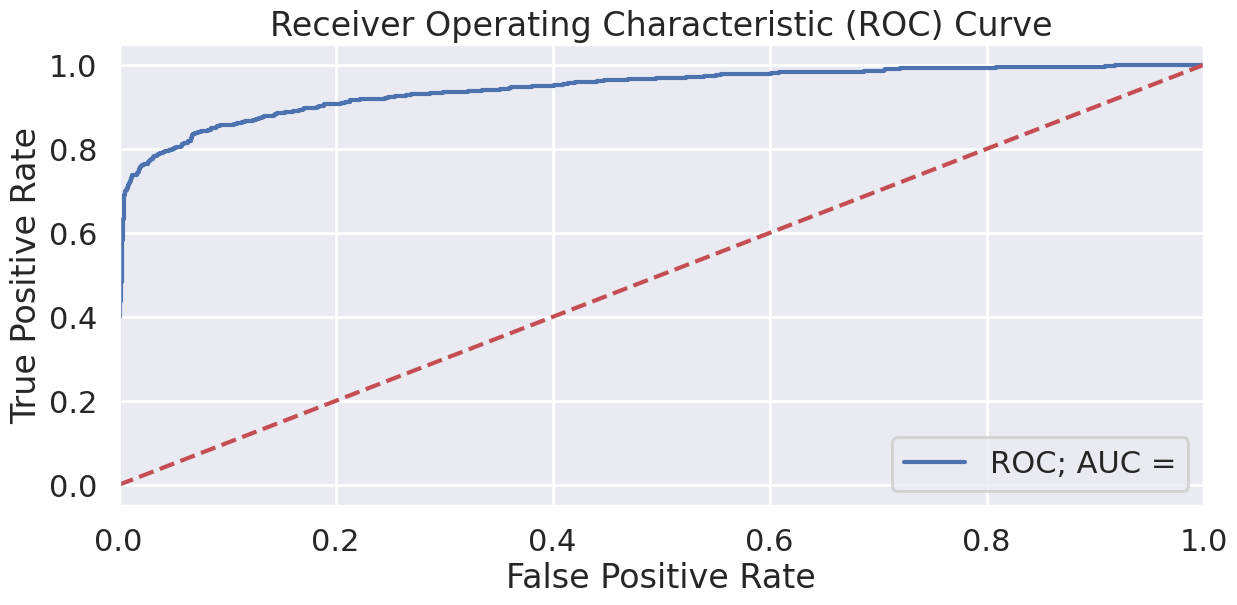

In [ ]:
probs = predictor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(14,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'ROC; AUC =' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# importing the result to Kaggle

In [ ]:
label='loan_status'
competition_name = "playground-series-s4e10"

In [ ]:
# Full code for future use (can upload to github for the future and run as .py code script)
sample_submission[label]= predictor.best_estimator_.predict(test_data)
sample_submission[label].value_counts()
# save as csv
sample_submission.to_csv("my_submission.csv", index=False, header=True)
# submit the file to kaggle
!kaggle competitions submit {competition_name} -f my_submission.csv -m "submission_1"
# View results
!kaggle competitions submissions -c {competition_name}

100% 305k/305k [00:00<00:00, 1.43MB/s]
Successfully submitted to Loan Approval PredictionfileName           date                 description   status    publicScore  privateScore  
-----------------  -------------------  ------------  --------  -----------  ------------  
my_submission.csv  2025-03-08 13:26:09  submission_1  pending                              
my_submission.csv  2024-11-06 17:45:50  submission_1  complete  0.87943      0.86260       
my_submission.csv  2024-11-06 17:45:43  submission_1  complete  0.87670      0.86114       
my_submission.csv  2024-11-06 17:45:35  submission_1  complete  0.86082      0.84692       
my_submission.csv  2024-11-06 17:39:23  submission_1  complete  0.87943      0.86260       
my_submission.csv  2024-11-06 17:39:17  submission_1  complete  0.87670      0.86114       
my_submission.csv  2024-11-06 17:39:09  submission_1  complete  0.86082      0.84692       
my_submission.csv  2024-11-05 13:16:06  submission_1  complete  0.87943      0.8626

In [ ]:
X.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length  
count                58645.000000  
mean                     5.813556  
std                      4.029196  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [ ]:
## Display the whole cintent of the column
# with pd.option_context('display.max_colwidth', None):
#   display(col_types_eda_df)

column_names
identifier                                                                                                                                                        ['id']
numerical   ['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
boolean                                                                                                                                                               []
object                                                                               ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
category                                                                                                                                                              []
datetime                                                                                                                                                              []
missing                                                                                                                                                               []
other                                                                                                                                                                 []

In [ ]:
X_train.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
!git clone https://github.com/ambiernat/ml_eda.git

Cloning into 'ml_eda'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 103 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 37.83 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
#run the uploaded script
!python /content/ml_eda/column_types.py
#or if wd changed to Kaggle folder on my drive this should be:
#!python /content/drive/MyDrive/Kaggle/ml_eda/column_types.py

Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: /content/kaggle_data/train.csv
                                                 column_names
identifier                                             ['id']
numerical   ['id', 'person_age', 'person_income', 'person_...
boolean                                                    []
object      ['person_home_ownership', 'loan_intent', 'loan...
category                                                   []
datetime                                                   []
missing                                                    []
other                                                      []
Dataframe Name:col_types.csv. This dataframe is also saved in the EDA folder


In [ ]:
# # Download the dataset into the computer 'Downloads folder'
# from google.colab import files
# files.download('col_types_eda_df.csv')

In [ ]:
!python /content/ml_eda/histogram_categoricalvars.py

Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: object address  : 0x78c398d3f640
object refcount : 2
object type     : 0x9d5ea0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr
^C


In [ ]:
!python /content/ml_eda/cat2hist_binTarget2hue.py

Traceback (most recent call last):
  File "/content/ml_eda/cat2hist_binTarget2hue.py", line 12, in <module>
    import seaborn as sns
  File "/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py", line 12, in <module>
    from .widgets import *  # noqa: F401,F403
    ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/seaborn/widgets.py", line 6, in <module>
    from ipywidgets import interact, FloatSlider, IntSlider
  File "/usr/local/lib/python3.11/dist-packages/ipywidgets/__init__.py", line 25, in <module>
    from .widgets import *
  File "/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/__init__.py", line 14, in <module>
    from .widget_float import FloatText, BoundedFloatText, FloatSlider, FloatProgress, FloatRangeSlider, FloatLogSlider
  File "/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_float.py", line 17, in <module>
    from .widget_int import ProgressStyle, SliderStyle
  File "/usr/local/lib/python3.11/dist-packages/i

In [ ]:
!python /content/ml_eda/numerical_variousGraphs1.py

Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: /content/kaggle_data/train.csv
Paste path to the table with column types and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/test.csv: /content/EDA/col_types.csv
Enter the name of the target column and press enter (without the '' marks), e.g. loan_statusloan_status
File name: allNumerical_variousGraphs. This is also saved in the EDA folder


In [ ]:
!python /content/ml_eda/singleNumerical_variousGraphs1.py

Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: /content/kaggle_data/train.csv
Enter the name of the target column and press enter (without the '' marks), e.g. loan_statusloan_status
Enter the name of the required numerical column and press enter (without the '' marks), e.g. loan_amountloan_amnt
File name: singleNumerical_variousGraphs. This is also saved in the EDA folder


In [ ]:
# #force remove a folder
# !rm -rf /content/ml_eda

In [ ]:
import pandas as pd

In [ ]:
column_types_table = pd.read_csv('/content/EDA/col_types.csv', index_col=0)

In [ ]:
column_types_table

column_names
identifier                                             ['id']
numerical   ['id', 'person_age', 'person_income', 'person_...
boolean                                                    []
object      ['person_home_ownership', 'loan_intent', 'loan...
category                                                   []
datetime                                                   []
missing                                                    []
other                                                      []

In [ ]:
import ast
# convert string representation of a list to a list
object_cols = ast.literal_eval(column_types_table.loc['object'].iloc[0])
identifier_cols = ast.literal_eval(column_types_table.loc['identifier'].iloc[0])
numerical_cols = ast.literal_eval(column_types_table.loc['numerical'].iloc[0])
numerical_cols = list(set(numerical_cols)-set(identifier_cols)-set(['loan_status']))
numerical_target = numerical_cols + ['loan_status']

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/kaggle_data/train.csv')

In [ ]:
#plot with density - strasznie dlugo sie generuje


# import seaborn as sns

# g=sns.pairplot(train[numerical_cols])
# g.map_lower(sns.kdeplot, levels=4, color=".2")

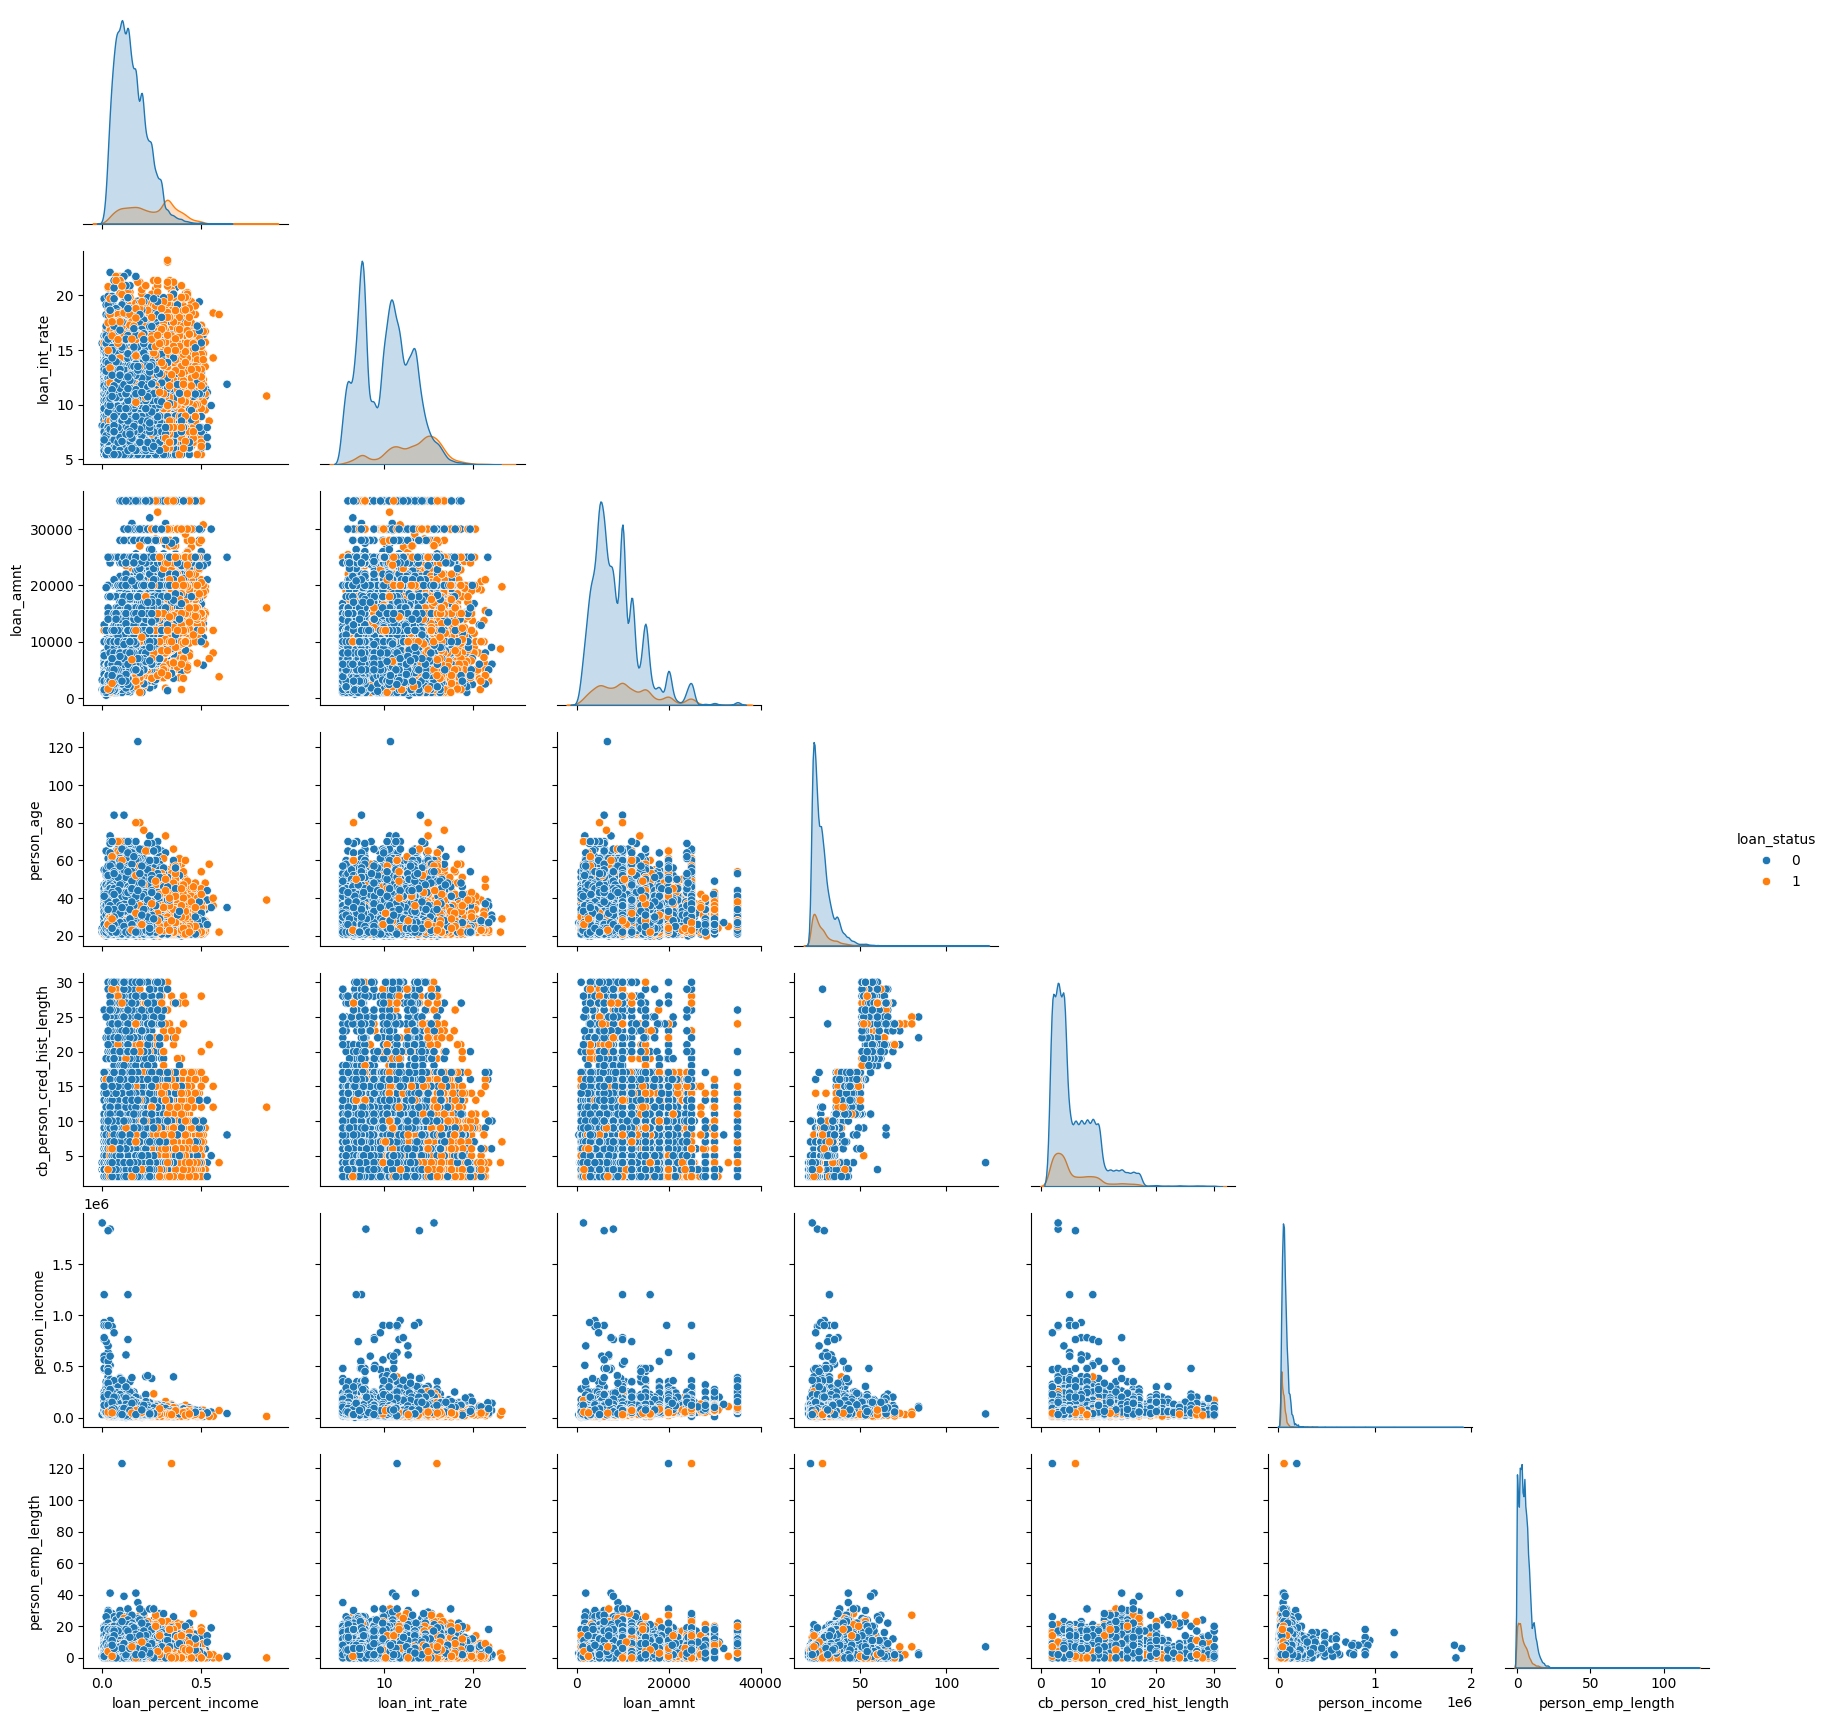

In [ ]:
#sns.pairplot(penguins, hue="species", diag_kind="hist")
sns.pairplot(train[numerical_target], hue='loan_status', corner=True)

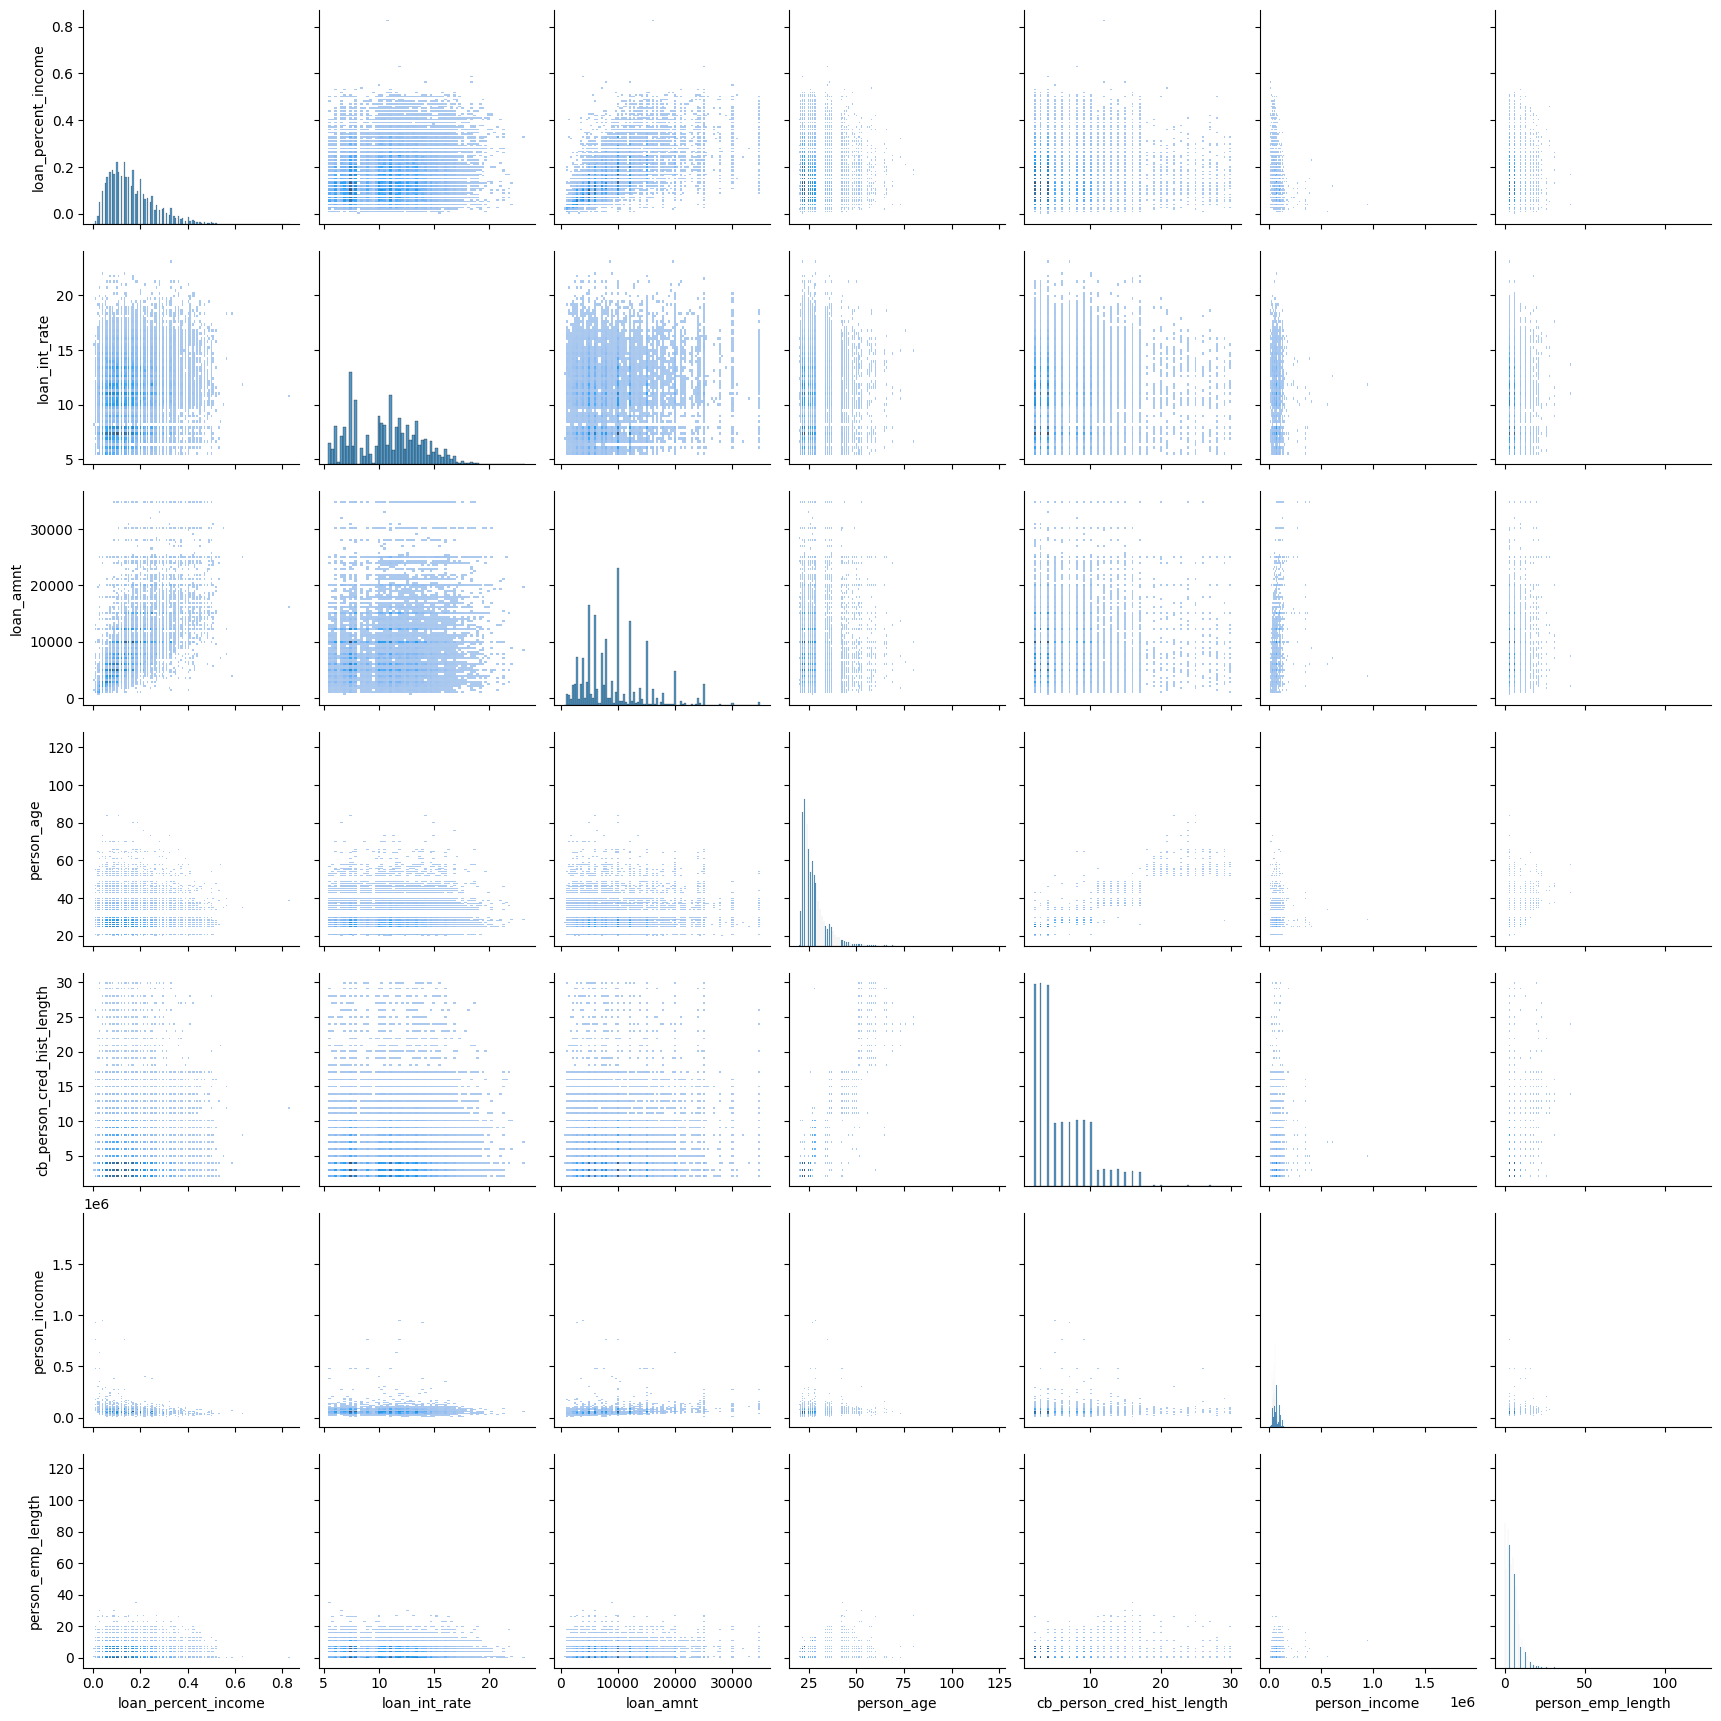

In [ ]:
sns.pairplot(train[numerical_cols], kind="hist") # the bivariate histigrams can also be called hexbins

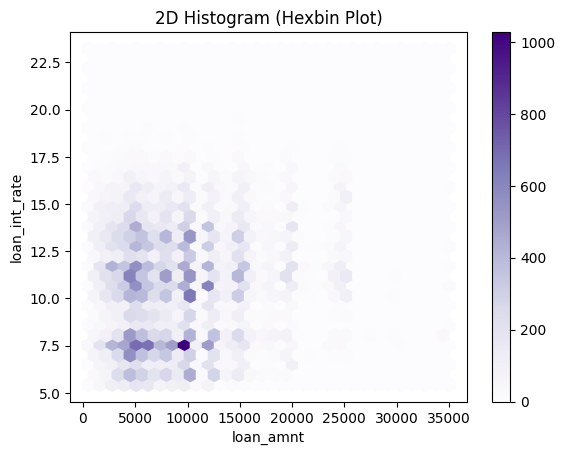

In [ ]:
# Creating a 2D histogram (hexbin plot)
plt.hexbin(x=train['loan_amnt'], y=train['loan_int_rate'], gridsize=30, cmap='Purples')

# Adding labels and title
plt.xlabel('loan_amnt')
plt.ylabel('loan_int_rate')
plt.title('2D Histogram (Hexbin Plot)')

# Adding colorbar
plt.colorbar()

# Display the plot
plt.show()

In [ ]:
import seaborn as sns

<Axes: xlabel='loan_amnt', ylabel='loan_int_rate'>

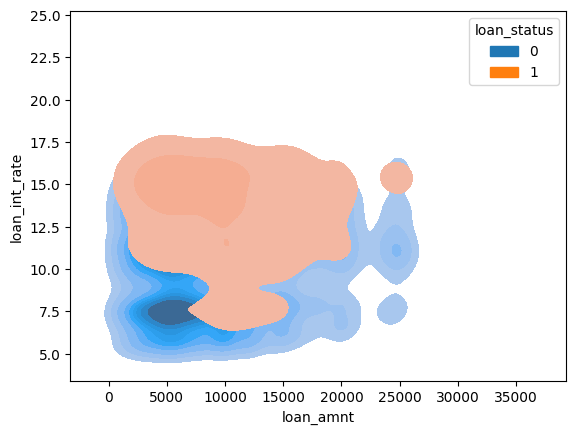

In [ ]:
sns.kdeplot(
    data=train[numerical_target], x=train['loan_amnt'], y=train['loan_int_rate'], hue="loan_status", fill=True,
)

<Axes: xlabel='loan_amnt', ylabel='loan_int_rate'>

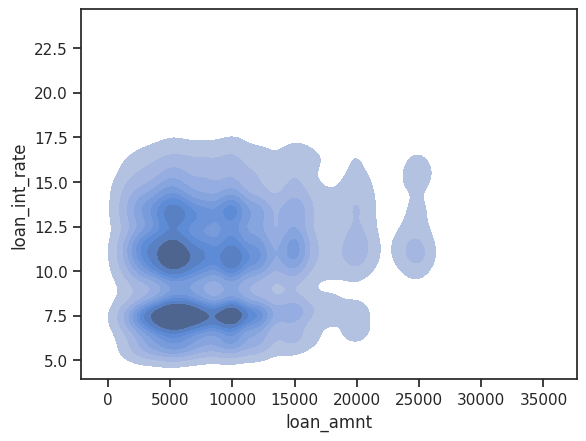

In [ ]:
sns.kdeplot(
    data=train[numerical_target], x=train['loan_amnt'], y=train['loan_int_rate'], fill=True,
)

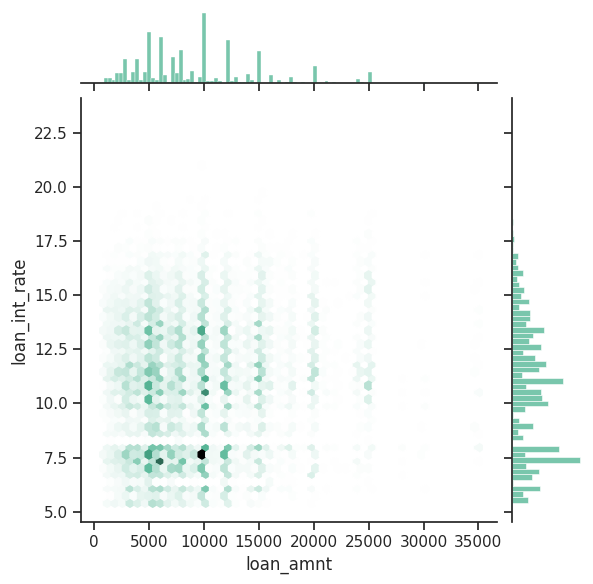

In [ ]:
# Hexbin Plot with marginal distributions

sns.set_theme(style="ticks")

# rs = np.random.RandomState(11)
# x = rs.gamma(2, size=1000)
# y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=train['loan_amnt'], y=train['loan_int_rate'], kind="hex", color="#4CB391")

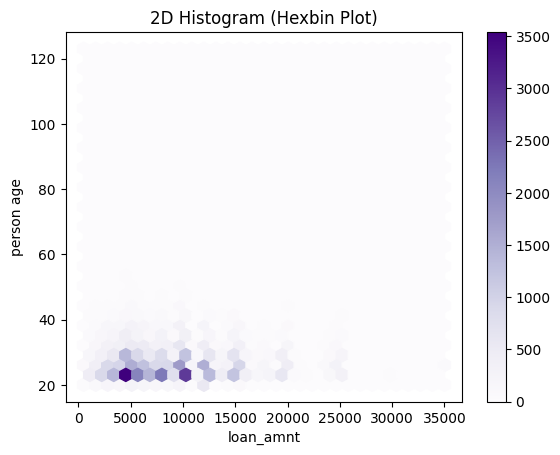

In [ ]:
# Creating a 2D histogram (hexbin plot)
plt.hexbin(x=train['loan_amnt'], y=train['loan_int_rate'], gridsize=30, cmap='Purples')

# Adding labels and title
plt.xlabel('loan_amnt')
plt.ylabel('person age')
plt.title('2D Histogram (Hexbin Plot)')

# Adding colorbar
plt.colorbar()

# Display the plot
plt.show()

In [ ]:
#imports Matplotlib library and assigns shorthand 'plt'
import matplotlib.pyplot as plt
#imports Seaborn library and assigns shorthand 'sns'
import seaborn as sns
#imports Plotly library and assigns shorthand 'px'
#import plotly.express as px

In [ ]:
# X = train.drop(['loan_status'], axis = 1)
# y = train['loan_status']

In [ ]:
# can also sort values by time:

# # from natsort import index_natsorted
# df.sort_values(
#     by="time",
#     key=lambda x: np.argsort(index_natsorted(df["time"]))
# )
#     time  value
# 0    0hr     10
# 3   48hr     40
# 2   72hr     30
# 4   96hr     50
# 1  128hr     20

In [ ]:
#
#Let’s generates a 2D hexbin plot using Matplotlib in Python,
#provides a visual representation of the 2D data distribution,
#where hexagons convey the density of data points.
#    ===> maybe for illustrating dependencies between categorical vs categorical variables!!
#https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
# yes! it's called a bivariate histogram



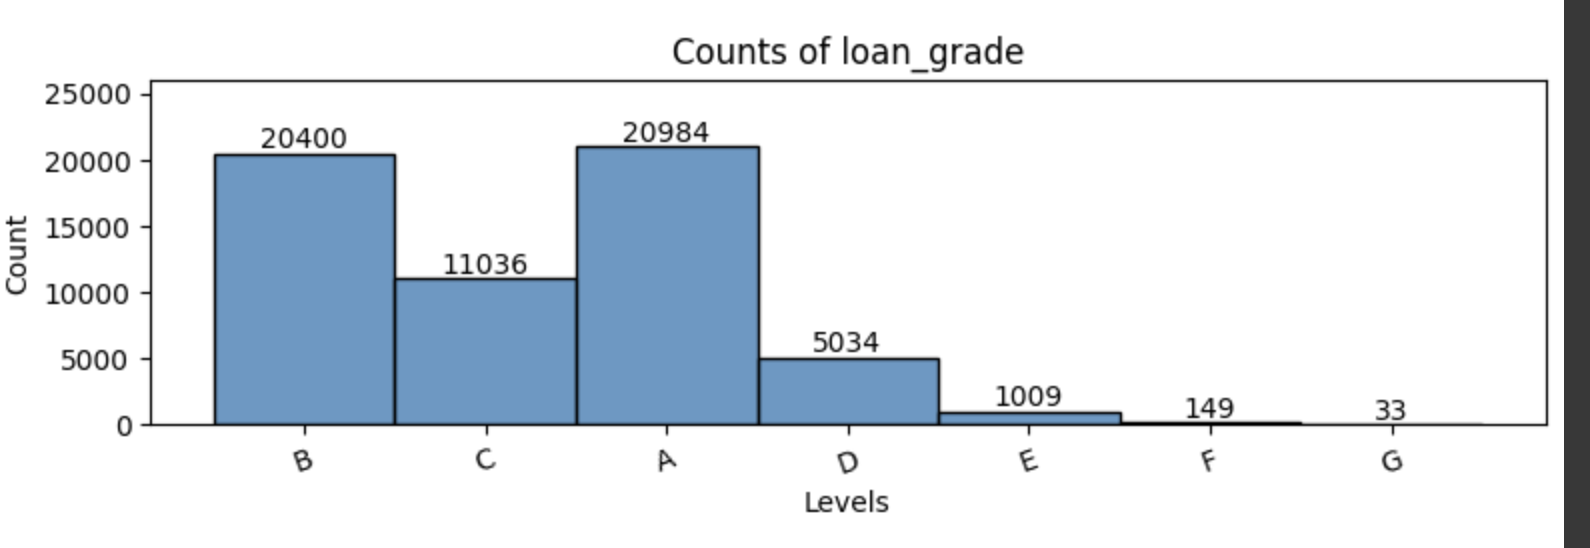

In [ ]:
# there is one ordinal numerical column - loan_grade. All other numerical columns are non-ordinal
# performing now encoding of the numerical features, accounting for the ordinal numerical column loan_grade
# where we want to preserve the order

In [ ]:
data[numerical_cols].head()

cb_person_cred_hist_length  loan_status  loan_int_rate  person_income  \
0                          14            0          11.49          35000   
1                           2            0          13.35          56000   
2                          10            0           8.90          28800   
3                           5            0          11.11          70000   
4                           3            0           6.92          60000   

   person_emp_length  person_age  loan_percent_income  loan_amnt  
0                0.0          37                 0.17       6000  
1                6.0          22                 0.07       4000  
2                8.0          29                 0.21       6000  
3               14.0          30                 0.17      12000  
4                2.0          22                 0.10       6000

In [ ]:
# Investigation of scales/outliers etc.
data[numerical_cols].describe()

cb_person_cred_hist_length   loan_status  loan_int_rate  person_income  \
count                58645.000000  58645.000000   58645.000000   5.864500e+04   
mean                     5.813556      0.142382      10.677874   6.404617e+04   
std                      4.029196      0.349445       3.034697   3.793111e+04   
min                      2.000000      0.000000       5.420000   4.200000e+03   
25%                      3.000000      0.000000       7.880000   4.200000e+04   
50%                      4.000000      0.000000      10.750000   5.800000e+04   
75%                      8.000000      0.000000      12.990000   7.560000e+04   
max                     30.000000      1.000000      23.220000   1.900000e+06   

       person_emp_length    person_age  loan_percent_income     loan_amnt  
count       58645.000000  58645.000000         58645.000000  58645.000000  
mean            4.701015     27.550857             0.159238   9217.556518  
std             3.959784      6.033216             0.091692   5563.807384  
min             0.000000     20.000000             0.000000    500.000000  
25%             2.000000     23.000000             0.090000   5000.000000  
50%             4.000000     26.000000             0.140000   8000.000000  
75%             7.000000     30.000000             0.210000  12000.000000  
max           123.000000    123.000000             0.830000  35000.000000

In [ ]:
# Given the facts about labelencoder etc. I think it makes sense to: feature engineer variables by doing the
# following:
# 1) joining of variables: categorical(with an adjusted scale)+numerical
# 2) original categorical variables convert using one-hot and running PCA on them

In [ ]:
numerical_cols

['cb_person_cred_hist_length',
 'loan_status',
 'loan_int_rate',
 'person_income',
 'person_emp_length',
 'person_age',
 'loan_percent_income',
 'loan_amnt']

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed) # parametr dla losowej cross-validation

#StratifiedKFold - wyprobowac!! dobre dla imbalanced classes


weight_scale_pos = np.sum([y_train==0])/y_train.shape[0]*100 # wagi dla klas scale_pos_weight (ratio of negative class to positive)

## ADD MORE MODELS TO THE PIPELINE HERE
models = Pipeline([("model",XGBClassifier(objective='binary:logistic',
                                         silent=True,
                                         njobs=2,
                                          scale_pos_weight = weight_scale_pos,
                                          enable_categorical=True
                                         ))]) # pipeline dla modelu



"""
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
      n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
"""

param_grids = {
    'model__n_estimators':ss.randint(10,300),
    'model__learning_rate':ss.uniform(0.01,0.3),
    #'model_reg_lambda':ss.uniform(0.1,3),
    'model__min_child_weight': ss.randint(5,50),
    'model__gamma': ss.uniform(0.1,3),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': ss.randint(5,30),
    #'model__scale_pos_weight': [weight_scale_pos]#, 0.9, 0.7, 0.5]
       } # parametry, które hyper-tuningujemy / optymalizujemy


predictor = RandomizedSearchCV(models, param_grids, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=2)


predictor.fit(X_train, y_train)
print(roc_auc_score(predictor.best_estimator_.predict(X_valid),y_valid),
        predictor.best_params_) # zwraca najwyzsza srednia "poprawność" modelu i parametryuj

NameError: name 'model_selection' is not defined

## Running  the model with addition of log-transformed numerical variables

In [ ]:
train_data[numerical_cols]

person_emp_length  loan_amnt  person_income  loan_percent_income  \
15619                2.0      10000          45000                 0.22   
28522                3.0      15000          60000                 0.25   
37596                4.0      10000          66500                 0.15   
19649                7.0       8000          72000                 0.11   
19606                6.0      12000          75000                 0.16   
...                  ...        ...            ...                  ...   
56649                9.0      17000          48000                 0.35   
7717                 6.0      12500          42000                 0.28   
4862                 9.0      15000          59000                 0.25   
2226                 5.0       8000          36000                 0.22   
52238                5.0       5000          48996                 0.10   

       person_age  cb_person_cred_hist_length  loan_int_rate  
15619          22                           2           9.38  
28522          23                           2          11.86  
37596          27                           5           7.88  
19649          25                           3           7.49  
19606          37                          11          13.49  
...           ...                         ...            ...  
56649          25                           2          10.99  
7717           27                           9          11.49  
4862           31                           6          16.77  
2226           31                           8           7.51  
52238          38                          13          10.37  

[52926 rows x 7 columns]

In [ ]:
def log_transform_numerical(df, col, original_cols_rmv=False):
  log_col = 'log_'+col
  df[log_col] = np.log(np.where(df[col]==0, 0.00001, df[col])) # add an arbitrarily small number to avoid problems with log0

  if original_cols_rmv: # element to control decision whether to keep original columns or remove them
    df=df.drop([col], axis=1)

  return df

In [ ]:
for col in numerical_cols:
  X_train = log_transform_numerical(df=X_train, col=col, original_cols_rmv=False)
  X_valid = log_transform_numerical(df=X_valid, col=col, original_cols_rmv=False)
  X_test = log_transform_numerical(df=X_test, col=col, original_cols_rmv=False)
  test_data = log_transform_numerical(df=test_data, col=col, original_cols_rmv=False)

In [ ]:
X_train.head() # check

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
15619                  RENT     MEDICAL          A                         N   
28522              MORTGAGE   EDUCATION          B                         N   
37596              MORTGAGE     VENTURE          A                         N   
19649              MORTGAGE     MEDICAL          A                         N   
19606                  RENT   EDUCATION          C                         Y   

       log_person_emp_length  log_loan_amnt  log_person_income  \
15619               0.693147       9.210340          10.714418   
28522               1.098612       9.615805          11.002100   
37596               1.386294       9.210340          11.104957   
19649               1.945910       8.987197          11.184421   
19606               1.791759       9.392662          11.225243   

       log_loan_percent_income  log_person_age  \
15619                -1.514128        3.091042   
28522                -1.386294        3.135494   
37596                -1.897120        3.295837   
19649                -2.207275        3.218876   
19606                -1.832581        3.610918   

       log_cb_person_cred_hist_length  log_loan_int_rate  
15619                        0.693147           2.238580  
28522                        0.693147           2.473171  
37596                        1.609438           2.064328  
19649                        1.098612           2.013569  
19606                        2.397895           2.601949

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed) # parametr dla losowej cross-validation

#StratifiedKFold - wyprobowac!! dobre dla imbalanced classes


weight_scale_pos = np.sum([y_train==0])/y_train.shape[0]*100 # wagi dla klas scale_pos_weight (ratio of negative class to positive)

## ADD MORE MODELS TO THE PIPELINE HERE
models = Pipeline([("model",XGBClassifier(objective='binary:logistic',
                                         silent=True,
                                         njobs=2,
                                          scale_pos_weight = weight_scale_pos,
                                          enable_categorical=True
                                         ))]) # pipeline dla modelu



"""
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
      n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
"""

param_grids = {
    'model__n_estimators':ss.randint(10,300),
    'model__learning_rate':ss.uniform(0.01,0.3),
    #'model_reg_lambda':ss.uniform(0.1,3),
    'model__min_child_weight': ss.randint(5,50),
    'model__gamma': ss.uniform(0.1,3),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': ss.randint(5,30),
    #'model__scale_pos_weight': [weight_scale_pos]#, 0.9, 0.7, 0.5]
       } # parametry, które hyper-tuningujemy / optymalizujemy


predictor = RandomizedSearchCV(models, param_grids, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=2)


predictor.fit(X_train, y_train)
print(roc_auc_score(predictor.best_estimator_.predict(X_valid),y_valid),
        predictor.best_params_) # zwraca najwyzsza srednia "poprawność" modelu i parametryuj

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "njobs", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.657048858387788 {'model__colsample_bytree': 0.6, 'model__gamma': np.float64(2.086367513221932), 'model__learning_rate': np.float64(0.04251670493235238), 'model__max_depth': 10, 'model__min_child_weight': 47, 'model__n_estimators': 230, 'model__subsample': 1.0}


In [ ]:
y_prediction = predictor.best_estimator_.predict(X_test) # predykcja uzywajac modelu

-------------------
Number of 'true' values in each class:
0 2515
1 418
-------------------
Confusion Matrix:
[[1714   19]
 [ 801  399]]
-------------------


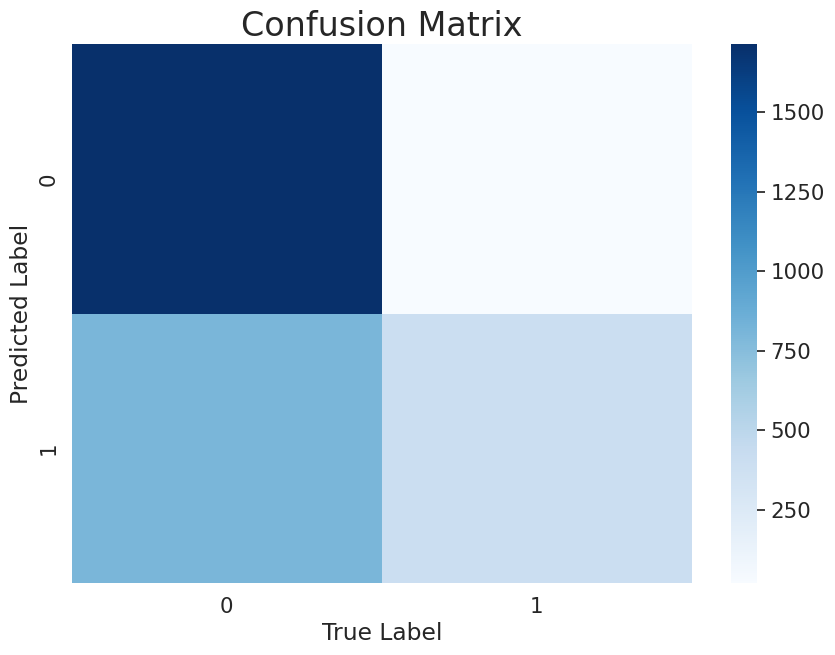

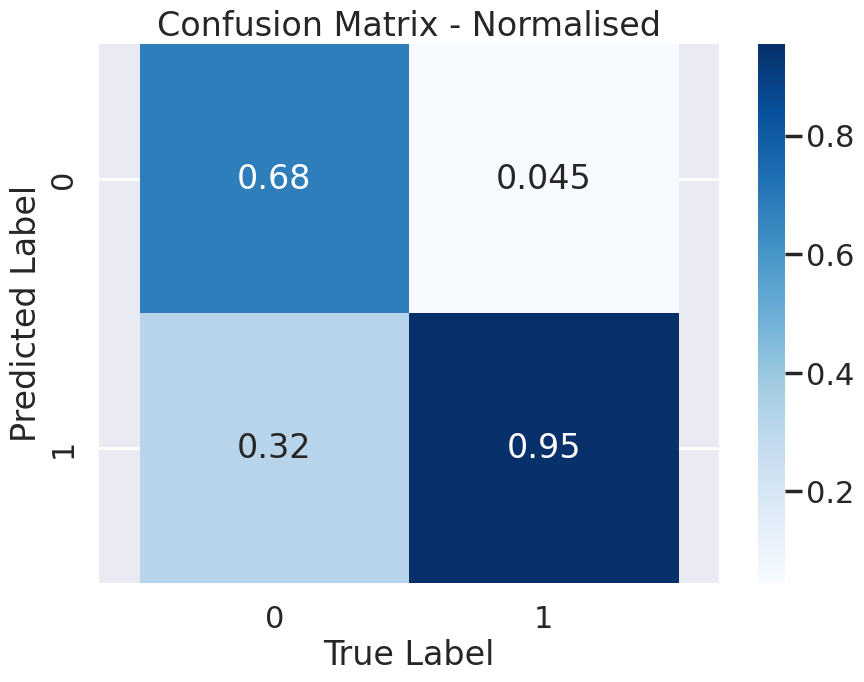

In [ ]:
ConfusionMtx_Report2(predictor.best_estimator_, X_test, y_test)

In [ ]:
roc_auc_score(y_test, y_prediction)

np.float64(0.8180281944695463)

In [ ]:

feature_importances = pd.DataFrame(predictor.best_estimator_.named_steps["model"].feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
person_home_ownership             0.228332
loan_grade                        0.212883
log_loan_percent_income           0.125843
log_person_income                 0.090683
log_loan_int_rate                 0.078318
loan_intent                       0.074565
cb_person_default_on_file         0.060714
log_loan_amnt                     0.040476
log_person_emp_length             0.035366
log_person_age                    0.026749
log_cb_person_cred_hist_length    0.026071

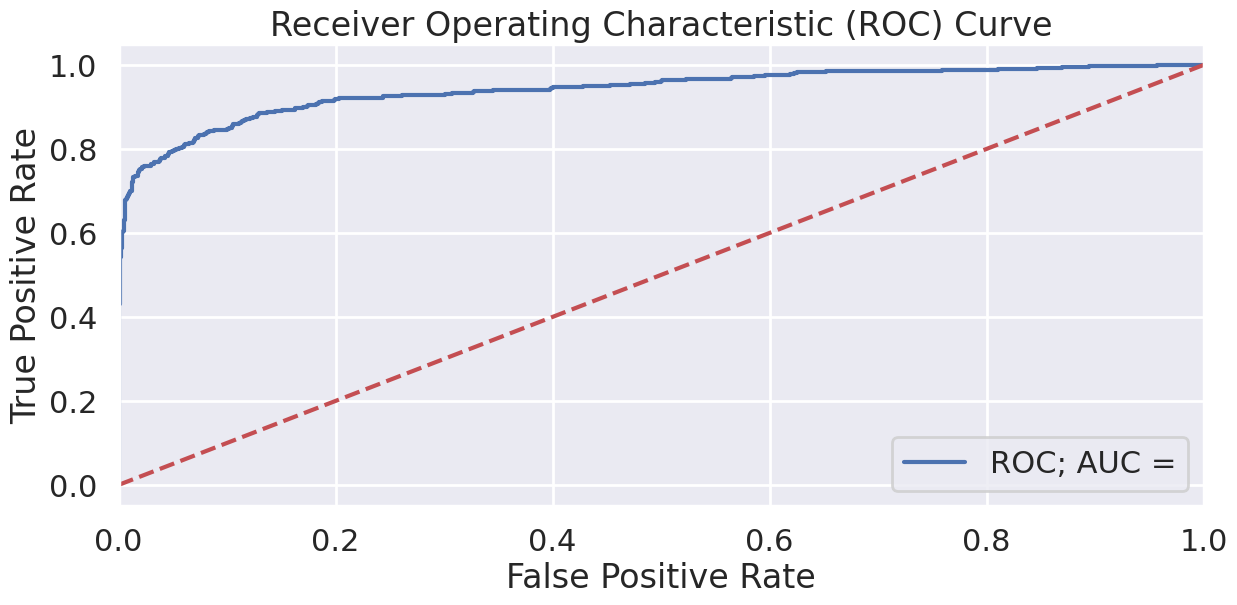

In [ ]:
probs = predictor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(14,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'ROC; AUC =' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Running the model with one-hot encoded categorical variables

In [ ]:
object_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
# loan grade is an ordinal variable

In [ ]:
# merging the datasets only for the purpose of encoding, so that to exclude the possibility to a new category to appear in a dataset
# Note! in practical application it's not the best approach because the new data can contain #previously unseen' observations
# should rather build a reasoning on how to treat those unseen observations - maybe use an 'unseen' category somehow or something else or replace with the most common etc.
# would neet to decide

In [ ]:
pdList = [X_train, X_valid, X_test, test_data]  # List of your dataframes
all_data = pd.concat(pdList)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# encode the loan_grade variable using ordinal encoder
loan_grade_list=all_data['loan_grade']
loan_grade_list_sorted=list(set(loan_grade_list.values))
loan_grade_list_sorted.sort()

encoder = OrdinalEncoder(categories=[loan_grade_list_sorted])

X_train['enc_loan_grade'] = encoder.fit_transform(X_train[['loan_grade']]) +1 # adding 1 because to me it's more intuitive, also 0 is quite a specific number in general
X_valid['enc_loan_grade'] = encoder.fit_transform(X_valid[['loan_grade']])+1
X_test['enc_loan_grade'] = encoder.fit_transform(X_test[['loan_grade']])+1
test_data['enc_loan_grade'] = encoder.fit_transform(test_data[['loan_grade']])+1

In [ ]:
X_train.shape, X_valid.shape, X_test.shape, test_data.shape, y_train.shape, y_valid.shape, y_test.shape

((52926, 12), (2786, 12), (2933, 12), (39098, 13), (52926,), (2786,), (2933,))

In [ ]:
X_train.head()

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
15619                  RENT     MEDICAL          A                         N   
28522              MORTGAGE   EDUCATION          B                         N   
37596              MORTGAGE     VENTURE          A                         N   
19649              MORTGAGE     MEDICAL          A                         N   
19606                  RENT   EDUCATION          C                         Y   

       person_age  loan_amnt  loan_int_rate  loan_percent_income  \
15619          22      10000           9.38                 0.22   
28522          23      15000          11.86                 0.25   
37596          27      10000           7.88                 0.15   
19649          25       8000           7.49                 0.11   
19606          37      12000          13.49                 0.16   

       person_emp_length  cb_person_cred_hist_length  person_income  \
15619                2.0                           2          45000   
28522                3.0                           2          60000   
37596                4.0                           5          66500   
19649                7.0                           3          72000   
19606                6.0                          11          75000   

       enc_loan_grade  
15619             1.0  
28522             2.0  
37596             1.0  
19649             1.0  
19606             3.0

In [ ]:
# one hot encoding all variables (incl. loan_grade)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(all_data[object_cols])

X_train_onehot = encoder.transform(X_train[object_cols])
one_hot_X_train = pd.DataFrame(X_train_onehot, columns=encoder.get_feature_names_out(object_cols))
one_hot_X_train.index=X_train.index # adjusting index, because one-hot encoding somehow resets index, so enforcing the same index as the primary dataframe
X_train = pd.concat([X_train, one_hot_X_train], axis=1)


In [ ]:
X_valid_onehot = encoder.transform(X_valid[object_cols])
one_hot_X_valid = pd.DataFrame(X_valid_onehot, columns=encoder.get_feature_names_out(object_cols))
one_hot_X_valid.index=X_valid.index # adjusting index, because one-hot encoding somehow resets index, so enforcing the same index as the primary dataframe
X_valid = pd.concat([X_valid, one_hot_X_valid], axis=1)

X_test_onehot = encoder.transform(X_test[object_cols])
one_hot_X_test = pd.DataFrame(X_test_onehot, columns=encoder.get_feature_names_out(object_cols))
one_hot_X_test.index=X_test.index # adjusting index, because one-hot encoding somehow resets index, so enforcing the same index as the primary dataframe
X_test = pd.concat([X_test, one_hot_X_test], axis=1)

test_data_onehot = encoder.transform(test_data[object_cols])
one_hot_test_data = pd.DataFrame(test_data_onehot, columns=encoder.get_feature_names_out(object_cols))
one_hot_test_data.index=test_data.index # adjusting index, because one-hot encoding somehow resets index, so enforcing the same index as the primary dataframe
test_data = pd.concat([test_data, one_hot_test_data], axis=1)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape, test_data.shape, y_train.shape, y_valid.shape, y_test.shape

((52926, 31), (2786, 31), (2933, 31), (39098, 32), (52926,), (2786,), (2933,))

In [ ]:
X_train.head()

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
15619                  RENT     MEDICAL          A                         N   
28522              MORTGAGE   EDUCATION          B                         N   
37596              MORTGAGE     VENTURE          A                         N   
19649              MORTGAGE     MEDICAL          A                         N   
19606                  RENT   EDUCATION          C                         Y   

       person_age  loan_amnt  loan_int_rate  loan_percent_income  \
15619          22      10000           9.38                 0.22   
28522          23      15000          11.86                 0.25   
37596          27      10000           7.88                 0.15   
19649          25       8000           7.49                 0.11   
19606          37      12000          13.49                 0.16   

       person_emp_length  cb_person_cred_hist_length  ...  \
15619                2.0                           2  ...   
28522                3.0                           2  ...   
37596                4.0                           5  ...   
19649                7.0                           3  ...   
19606                6.0                          11  ...   

       loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
15619                  0.0           1.0           0.0           0.0   
28522                  0.0           0.0           1.0           0.0   
37596                  1.0           1.0           0.0           0.0   
19649                  0.0           1.0           0.0           0.0   
19606                  0.0           0.0           0.0           1.0   

       loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
15619           0.0           0.0           0.0           0.0   
28522           0.0           0.0           0.0           0.0   
37596           0.0           0.0           0.0           0.0   
19649           0.0           0.0           0.0           0.0   
19606           0.0           0.0           0.0           0.0   

       cb_person_default_on_file_N  cb_person_default_on_file_Y  
15619                          1.0                          0.0  
28522                          1.0                          0.0  
37596                          1.0                          0.0  
19649                          1.0                          0.0  
19606                          0.0                          1.0  

[5 rows x 31 columns]

In [ ]:
X_train = X_train.drop(object_cols, axis=1)
X_valid = X_valid.drop(object_cols, axis=1)
X_test = X_test.drop(object_cols, axis=1)
test_data = test_data.drop(object_cols, axis=1)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape, test_data.shape, y_train.shape, y_valid.shape, y_test.shape

((52926, 27), (2786, 27), (2933, 27), (39098, 28), (52926,), (2786,), (2933,))

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed) # parametr dla losowej cross-validation

#StratifiedKFold - wyprobowac!! dobre dla imbalanced classes


weight_scale_pos = np.sum([y_train==0])/y_train.shape[0]*100 # wagi dla klas scale_pos_weight (ratio of negative class to positive)

## ADD MORE MODELS TO THE PIPELINE HERE
models = Pipeline([("model",XGBClassifier(objective='binary:logistic',
                                         silent=True,
                                         njobs=2,
                                          scale_pos_weight = weight_scale_pos,
                                          enable_categorical=True
                                         ))]) # pipeline dla modelu



"""
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
      n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
"""

param_grids = {
    'model__n_estimators':ss.randint(10,300),
    'model__learning_rate':ss.uniform(0.01,0.3),
    #'model_reg_lambda':ss.uniform(0.1,3),
    'model__min_child_weight': ss.randint(5,50),
    'model__gamma': ss.uniform(0.1,3),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': ss.randint(5,30),
    #'model__scale_pos_weight': [weight_scale_pos]#, 0.9, 0.7, 0.5]
       } # parametry, które hyper-tuningujemy / optymalizujemy


predictor = RandomizedSearchCV(models, param_grids, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=2)


predictor.fit(X_train, y_train)
print(roc_auc_score(predictor.best_estimator_.predict(X_valid),y_valid),
        predictor.best_params_) # zwraca najwyzsza srednia "poprawność" modelu i parametryuj

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:55:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "njobs", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.7500851907714653 {'model__colsample_bytree': 0.6, 'model__gamma': np.float64(2.068216606559702), 'model__learning_rate': np.float64(0.09142781706420829), 'model__max_depth': 23, 'model__min_child_weight': 34, 'model__n_estimators': 151, 'model__subsample': 0.8}


In [ ]:
y_prediction = predictor.best_estimator_.predict(X_test) # predykcja uzywajac modelu

-------------------
Number of 'true' values in each class:
0 2515
1 418
-------------------
Confusion Matrix:
[[2181   50]
 [ 334  368]]
-------------------


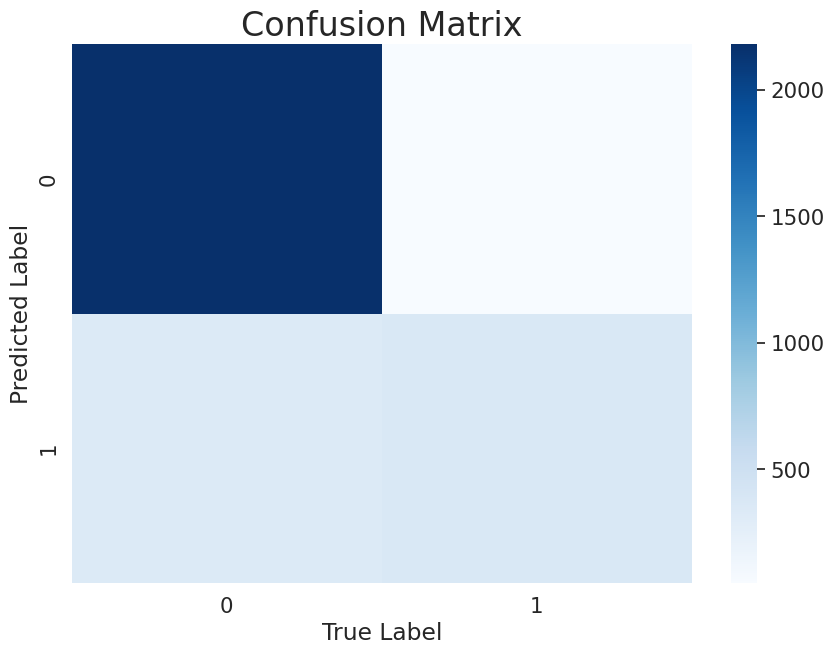

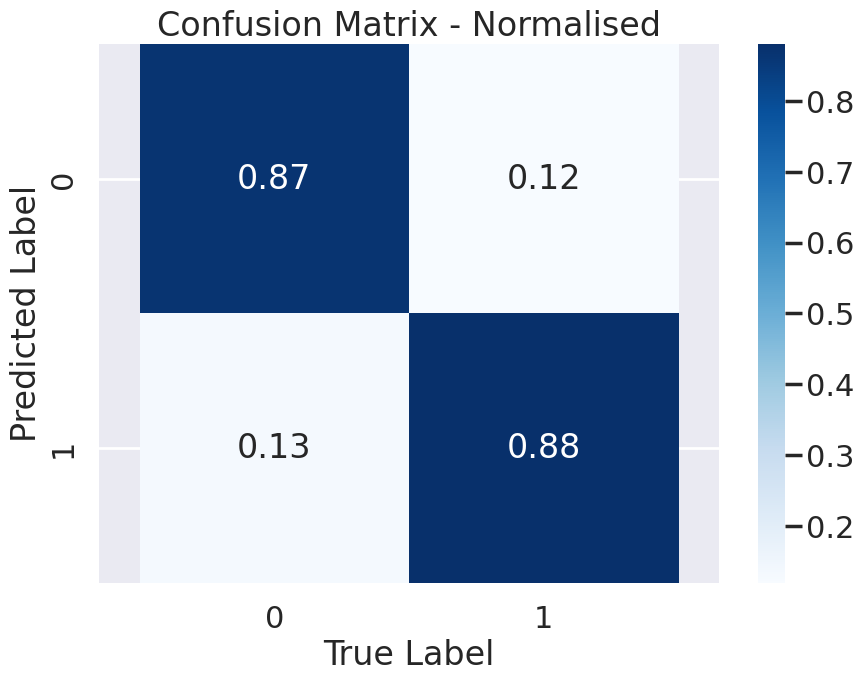

In [ ]:
ConfusionMtx_Report2(predictor.best_estimator_, X_test, y_test)

In [ ]:
roc_auc_score(y_test, y_prediction)

np.float64(0.8737897971025522)

In [ ]:

feature_importances = pd.DataFrame(predictor.best_estimator_.named_steps["model"].feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
person_home_ownership_RENT        0.134896
person_home_ownership_OWN         0.114842
enc_loan_grade                    0.106890
loan_intent_VENTURE               0.097977
loan_intent_HOMEIMPROVEMENT       0.053846
person_income                     0.040709
loan_grade_D                      0.037341
loan_percent_income               0.036414
loan_int_rate                     0.034941
loan_grade_C                      0.031622
loan_intent_DEBTCONSOLIDATION     0.025952
loan_intent_MEDICAL               0.025576
person_home_ownership_MORTGAGE    0.025445
loan_grade_E                      0.025427
loan_amnt                         0.025071
loan_intent_EDUCATION             0.020133
loan_intent_PERSONAL              0.019883
loan_grade_A                      0.018758
person_emp_length                 0.018298
person_age                        0.018036
loan_grade_F                      0.016819
cb_person_cred_hist_length        0.016539
person_home_ownership_OTHER       0.016087
loan_grade_B                      0.013900
cb_person_default_on_file_N       0.013810
cb_person_default_on_file_Y       0.010786
loan_grade_G                      0.000000

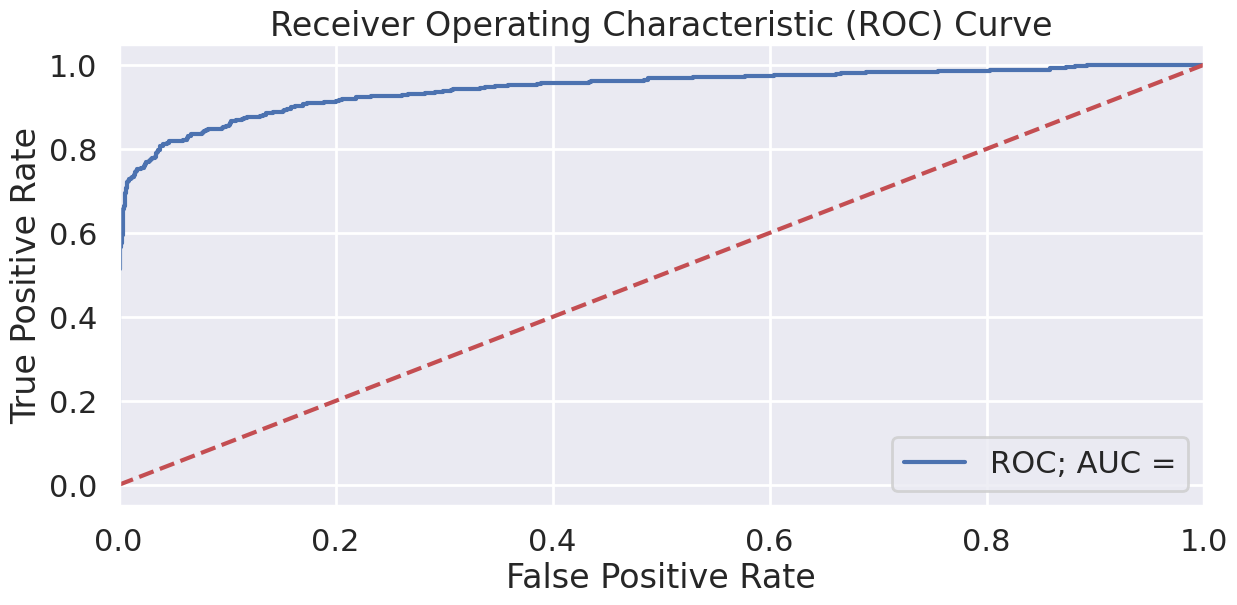

In [ ]:
probs = predictor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(14,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'ROC; AUC =' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Combining numerical & categorical variables a'la Chris Deotte
#### we firs need to know the scales of our numerical and categorical variables

In [ ]:
X_train.describe()

person_age     loan_amnt  loan_int_rate  loan_percent_income  \
count  52926.000000  52926.000000   52926.000000         52926.000000   
mean      27.549957   9199.766693      10.677750             0.159176   
std        6.044326   5551.981576       3.037333             0.091795   
min       20.000000    900.000000       5.420000             0.000000   
25%       23.000000   5000.000000       7.880000             0.090000   
50%       26.000000   8000.000000      10.750000             0.140000   
75%       30.000000  12000.000000      12.990000             0.210000   
max      123.000000  35000.000000      23.220000             0.830000   

       person_emp_length  cb_person_cred_hist_length  person_income  
count       52926.000000                52926.000000   5.292600e+04  
mean            4.700525                    5.809375   6.399005e+04  
std             3.966352                    4.027576   3.835533e+04  
min             0.000000                    2.000000   4.200000e+03  
25%             2.000000                    3.000000   4.200000e+04  
50%             4.000000                    4.000000   5.800000e+04  
75%             7.000000                    8.000000   7.500000e+04  
max           123.000000                   30.000000   1.900000e+06

In [ ]:
all_data[numerical_cols + object_cols].describe() # checking if the maximum values are for the whole dataset

person_age     loan_amnt  loan_int_rate  loan_percent_income  \
count  97743.000000  97743.000000   97743.000000         97743.000000   
mean      27.557227   9231.120663      10.671211             0.159372   
std        6.033008   5568.786009       3.028910             0.091668   
min       20.000000    500.000000       5.420000             0.000000   
25%       23.000000   5000.000000       7.880000             0.090000   
50%       26.000000   8000.000000      10.750000             0.140000   
75%       30.000000  12000.000000      12.990000             0.210000   
max      123.000000  35000.000000      23.220000             0.830000   

       person_emp_length  cb_person_cred_hist_length  person_income  
count       97743.000000                97743.000000   9.774300e+04  
mean            4.695436                    5.820417   6.405189e+04  
std             3.923469                    4.046423   3.794080e+04  
min             0.000000                    2.000000   4.000000e+03  
25%             2.000000                    3.000000   4.200000e+04  
50%             4.000000                    4.000000   5.800000e+04  
75%             7.000000                    8.000000   7.574400e+04  
max           123.000000                   30.000000   1.900000e+06

person_age - rather smaller than 100, delete outliers
loan_amnt - /1000 wtedy bedzie na pewno mniej niz 100
interest rate<100
loan_% income tez <100
person_emp_length <100
person_cred_hist_length<100
person income max 2mln

In [ ]:
X_train['person_income'].head()

15619    45000
28522    60000
37596    66500
19649    72000
19606    75000
Name: person_income, dtype: int64

In [ ]:
X_train = X_train[X_train.person_age < 100]
y_train = y_train[~y_train.index.isin([47336])]



In [ ]:
X_train['loan_amnt_k']=X_train['loan_amnt']/1000
X_valid['loan_amnt_k']=X_valid['loan_amnt']/1000
X_test['loan_amnt_k']=X_test['loan_amnt']/1000
test_data['loan_amnt_k']=test_data['loan_amnt']/1000

X_train['person_income_100k']=X_train['person_income']/1000
X_valid['person_income_100k']=X_valid['person_income']/1000
X_test['person_income_100k']=X_test['person_income']/1000
test_data['person_income_100k']=test_data['person_income']/100000




In [ ]:
# X_train=X_train.drop(['person_income_k'],axis=1)
# X_valid=X_valid.drop(['person_income_k'],axis=1)
# X_test=X_test.drop(['person_income_k'],axis=1)
# test_data=test_data.drop(['person_income_k'],axis=1)

KeyError: "['person_income_k'] not found in axis"

In [ ]:
X_train=X_train.drop(['loan_amnt','person_income'],axis=1)
X_valid=X_valid.drop(['loan_amnt','person_income'],axis=1)
X_test=X_test.drop(['loan_amnt','person_income'],axis=1)
test_data=test_data.drop(['loan_amnt','person_income'],axis=1)



In [ ]:
X_train.describe()

person_age  loan_int_rate  loan_percent_income  person_emp_length  \
count  52925.000000   52925.000000         52925.000000       52925.000000   
mean      27.548153      10.677749             0.159175           4.700482   
std        6.030126       3.037362             0.091796           3.966377   
min       20.000000       5.420000             0.000000           0.000000   
25%       23.000000       7.880000             0.090000           2.000000   
50%       26.000000      10.750000             0.140000           4.000000   
75%       30.000000      12.990000             0.210000           7.000000   
max       84.000000      23.220000             0.830000         123.000000   

       cb_person_cred_hist_length   loan_amnt_k  person_income_100k  
count                52925.000000  52925.000000        52925.000000  
mean                     5.809410      9.199814           63.990578  
std                      4.027606      5.552023           38.355499  
min                      2.000000      0.900000            4.200000  
25%                      3.000000      5.000000           42.000000  
50%                      4.000000      8.000000           58.000000  
75%                      8.000000     12.000000           75.000000  
max                     30.000000     35.000000         1900.000000

looking at outliers for the age, emp_length and person_income variables

In [ ]:
all_data.loc[(all_data['person_age'] >= 90)]

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
47336              MORTGAGE    PERSONAL          B                         N   
33824                  RENT     MEDICAL          E                         Y   

       person_age  loan_amnt  loan_int_rate  loan_percent_income  \
47336         123       6700          10.75                 0.18   
33824          94      16000          16.82                 0.29   

       person_emp_length  cb_person_cred_hist_length  person_income  \
47336                7.0                           4          36000   
33824                2.0                          27          56628   

       loan_amnt_k  person_income_k       id  
47336          6.7           36.000      NaN  
33824         16.0           56.628  92469.0

This entry looks strange. While not completely impossible it is not likely a person with such a senior age would be given any loan.
==> delete the record

In [ ]:
all_data.loc[(all_data['person_income_k'] >= 1000)]

person_home_ownership        loan_intent loan_grade  \
12404                  RENT            VENTURE          A   
37591              MORTGAGE  DEBTCONSOLIDATION          C   
19060              MORTGAGE  DEBTCONSOLIDATION          A   
17387              MORTGAGE          EDUCATION          D   
2093                   RENT           PERSONAL          A   
16742              MORTGAGE            MEDICAL          B   
24043              MORTGAGE            MEDICAL          A   
33361                  RENT    HOMEIMPROVEMENT          A   
34007              MORTGAGE  DEBTCONSOLIDATION          B   

      cb_person_default_on_file  person_age  loan_amnt  loan_int_rate  \
12404                         N          25       8000           8.00   
37591                         N          29       6000          13.99   
19060                         N          32      16000           6.92   
17387                         Y          22       1500          15.62   
2093                          N          32      10000           7.51   
16742                         N          25       8000          11.71   
24043                         N          26      10000           6.54   
33361                         N          33      15000           5.42   
34007                         N          27       1500          10.37   

       loan_percent_income  person_emp_length  cb_person_cred_hist_length  \
12404                 0.04                0.0                           3   
37591                 0.03                8.0                           6   
19060                 0.13               16.0                           5   
17387                 0.00                6.0                           3   
2093                  0.01                2.0                           9   
16742                 0.01                7.0                           2   
24043                 0.01                0.0                           3   
33361                 0.09               13.0                           6   
34007                 0.00                4.0                           5   

       person_income  loan_amnt_k  person_income_k       id  
12404        1839784          8.0         1839.784      NaN  
37591        1824000          6.0         1824.000      NaN  
19060        1200000         16.0         1200.000      NaN  
17387        1900000          1.5         1900.000      NaN  
2093         1200000         10.0         1200.000      NaN  
16742        1200000          8.0         1200.000  75387.0  
24043        1200000         10.0         1200.000  82688.0  
33361        1782000         15.0         1782.000  92006.0  
34007        1900000          1.5         1900.000  92652.0

The record with a 22 year person taking a loan of 1.5k for education with earnings of nearly 2m looks very unlikely. It was probably 19k salary. Similarly records with indices 12404 and 37591

Let's delete records with person's age <=25, salary >=1mln and loan amount <=10k as these are quite unlikely and point to some issues with data. Divide the rest of the data by a further 10 to have at most a value of 200 for the person's income

OR RATHER as the extent of such records is small. Do not delete.
Delete however the one with age over 100 years old.

In [ ]:
all_data[object_cols].describe()

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  97743       97743      97743                     97743
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   50874       20347      34989                     83170

In [ ]:
object_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
numerical_cols

['person_age',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'person_emp_length',
 'cb_person_cred_hist_length',
 'person_income']

In [ ]:
numerical_cols2 = numerical_cols + ['loan_amnt_k','person_income_100k']

# Elements to remove
remove_cols = ['loan_amnt','person_income']

# Remove elements using list comprehension
numerical_cols2 = [x for x in numerical_cols2 if x not in remove_cols]



In [ ]:
COMBO = []
for col in object_cols:
    print(f"{col}, ",end="")
    # important! combining before factorisation, so that we make sure there is no unknown value
    # in the test dataset
    # however is it really real-life scenario?! we should probably implement a conversion to 'UNSEEN'
    # because if data keeps coming up, then that would return an error!!!
    # for Kaggle it works, but for real-life not really
    combine = pd.concat([X_train[col],X_test[col], X_valid[col], test_data[col]],axis=0)
    combine,_ = pd.factorize(combine)
    print(combine,_)
    combine_df=pd.DataFrame(combine)
    X_train[col] = combine_df.iloc[combine_df.index.isin(X_train.index.tolist())]
    X_test[col] = combine_df.iloc[combine_df.index.isin(X_test.index.tolist())]
    X_valid[col] = combine_df.iloc[combine_df.index.isin(X_valid.index.tolist())]
    for col2 in numerical_cols2:
        n = f"{col}_{col2}"
        X_train[n] = X_train[col]*100 + X_train[col2]
        X_test[n] = X_test[col]*100 + X_test[col2]
        X_valid[n] = X_valid[col]*100 + X_valid[col2]
        COMBO.append(n)
print()
print(f"We engineer {len(COMBO)} new columns!")
print( COMBO )

person_home_ownership, [0 1 1 ... 1 1 0] CategoricalIndex(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], categories=['MORTGAGE', 'OTHER', 'OWN', 'RENT'], ordered=False, dtype='category')
loan_intent, [0 1 2 ... 4 4 3] CategoricalIndex(['MEDICAL', 'EDUCATION', 'VENTURE', 'DEBTCONSOLIDATION',
                  'PERSONAL', 'HOMEIMPROVEMENT'],
                 categories=['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE'], ordered=False, dtype='category')
loan_grade, [0 1 0 ... 0 3 1] Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')
cb_person_default_on_file, [0 0 0 ... 0 1 0] CategoricalIndex(['N', 'Y'], categories=['N', 'Y'], ordered=False, dtype='category')

We engineer 28 new columns!
['person_home_ownership_person_age', 'person_home_ownership_loan_int_rate', 'person_home_ownership_loan_percent_income', 'person_home_ownership_person_emp_length', 'person_home_ownership_cb_person_cred_hist_length', 'person_home_ownership_loan_amnt_k', 'person_home_own

In [ ]:
col_remove=object_cols+numerical_cols2


In [ ]:


# X_train = X_train.drop(col_remove, axis=1)
# X_valid = X_valid.drop(col_remove, axis=1)
# X_test = X_test.drop(col_remove, axis=1)


Index(['person_home_ownership_person_age',
       'person_home_ownership_loan_int_rate',
       'person_home_ownership_loan_percent_income',
       'person_home_ownership_person_emp_length',
       'person_home_ownership_cb_person_cred_hist_length',
       'person_home_ownership_loan_amnt_k',
       'person_home_ownership_person_income_100k', 'loan_intent_person_age',
       'loan_intent_loan_int_rate', 'loan_intent_loan_percent_income',
       'loan_intent_person_emp_length',
       'loan_intent_cb_person_cred_hist_length', 'loan_intent_loan_amnt_k',
       'loan_intent_person_income_100k', 'loan_grade_person_age',
       'loan_grade_loan_int_rate', 'loan_grade_loan_percent_income',
       'loan_grade_person_emp_length', 'loan_grade_cb_person_cred_hist_length',
       'loan_grade_loan_amnt_k', 'loan_grade_person_income_100k',
       'cb_person_default_on_file_person_age',
       'cb_person_default_on_file_loan_int_rate',
       'cb_person_default_on_file_loan_percent_income',
       '

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed) # parametr dla losowej cross-validation

#StratifiedKFold - wyprobowac!! dobre dla imbalanced classes


weight_scale_pos = np.sum([y_train==0])/y_train.shape[0]*100 # wagi dla klas scale_pos_weight (ratio of negative class to positive)

## ADD MORE MODELS TO THE PIPELINE HERE
models = Pipeline([("model",XGBClassifier(objective='binary:logistic',
                                         silent=True,
                                         njobs=2,
                                          scale_pos_weight = weight_scale_pos,
                                          enable_categorical=True
                                         ))]) # pipeline dla modelu



"""
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
      colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
      n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
      silent=True, subsample=1)
"""

param_grids = {
    'model__n_estimators':ss.randint(10,300),
    'model__learning_rate':ss.uniform(0.01,0.3),
    #'model_reg_lambda':ss.uniform(0.1,3),
    'model__min_child_weight': ss.randint(5,50),
    'model__gamma': ss.uniform(0.1,3),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__max_depth': ss.randint(5,30),
    #'model__scale_pos_weight': [weight_scale_pos]#, 0.9, 0.7, 0.5]
       } # parametry, które hyper-tuningujemy / optymalizujemy


predictor = RandomizedSearchCV(models, param_grids, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=2)


predictor.fit(X_train, y_train)
print(roc_auc_score(predictor.best_estimator_.predict(X_valid),y_valid),
        predictor.best_params_) # zwraca najwyzsza srednia "poprawność" modelu i parametryuj

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:07:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "njobs", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


0.6864825327446259 {'model__colsample_bytree': 0.8, 'model__gamma': np.float64(0.9019777173384127), 'model__learning_rate': np.float64(0.03674728965465456), 'model__max_depth': 28, 'model__min_child_weight': 39, 'model__n_estimators': 196, 'model__subsample': 0.8}


In [ ]:
y_prediction = predictor.best_estimator_.predict(X_test) # predykcja uzywajac modelu

-------------------
Number of 'true' values in each class:
0 2515
1 418
-------------------
Confusion Matrix:
[[2011   47]
 [ 504  371]]
-------------------


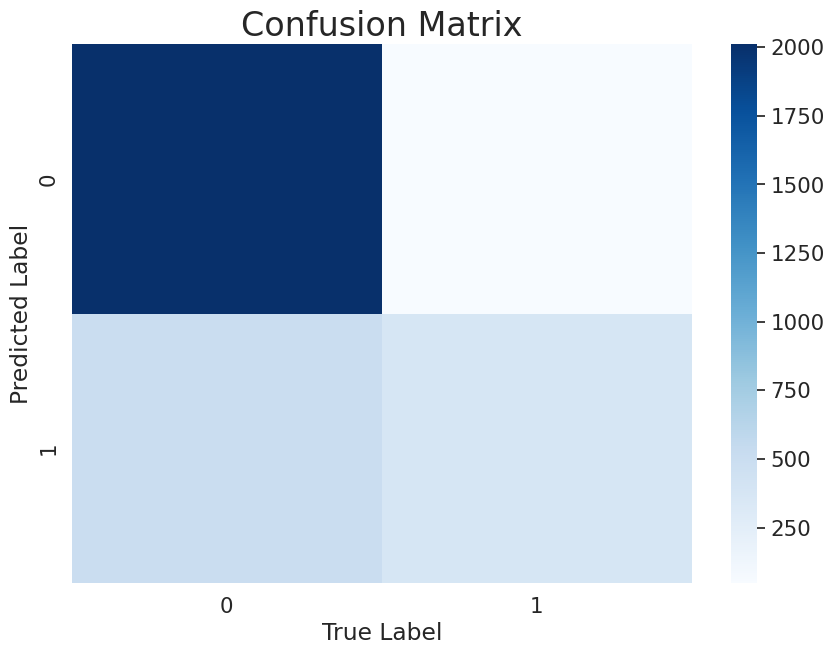

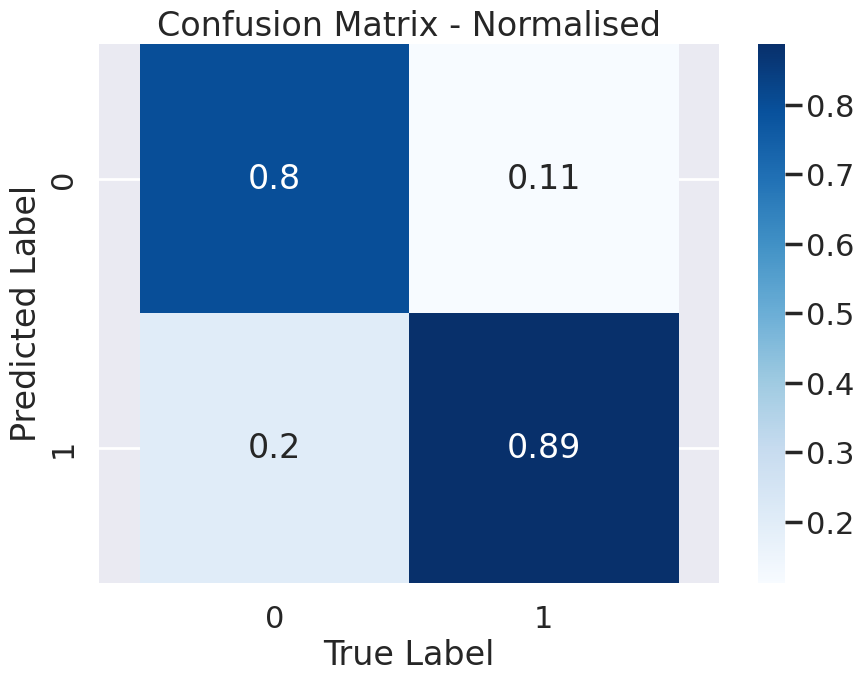

In [ ]:
ConfusionMtx_Report2(predictor.best_estimator_, X_test, y_test)

In [ ]:
roc_auc_score(y_test, y_prediction)

np.float64(0.8435810971491624)

In [ ]:

feature_importances = pd.DataFrame(predictor.best_estimator_.named_steps["model"].feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
loan_percent_income                                   0.106061
loan_int_rate                                         0.066127
cb_person_default_on_file_loan_percent_income         0.062334
cb_person_default_on_file_loan_int_rate               0.056504
person_income_100k                                    0.046362
cb_person_default_on_file_person_income_100k          0.038718
person_home_ownership_loan_int_rate                   0.029552
person_home_ownership_person_income_100k              0.029149
cb_person_default_on_file_cb_person_cred_hist_l...    0.023806
person_home_ownership_loan_percent_income             0.023044
person_home_ownership_person_emp_length               0.022727
cb_person_default_on_file_person_emp_length           0.022133
loan_grade_loan_percent_income                        0.021778
loan_grade_loan_int_rate                              0.021300
loan_grade_person_emp_length                          0.021294
cb_person_default_on_file_loan_amnt_k                 0.021187
loan_grade_person_income_100k                         0.021117
loan_intent_loan_int_rate                             0.020905
loan_amnt_k                                           0.020854
person_emp_length                                     0.020088
loan_intent_person_age                                0.019974
loan_intent_person_income_100k                        0.019795
loan_intent_cb_person_cred_hist_length                0.019613
person_home_ownership_cb_person_cred_hist_length      0.019563
person_age                                            0.019509
loan_intent_person_emp_length                         0.019485
person_home_ownership_person_age                      0.019455
loan_intent_loan_percent_income                       0.019014
loan_grade_loan_amnt_k                                0.018917
loan_grade_person_age                                 0.018791
cb_person_default_on_file_person_age                  0.018740
loan_intent_loan_amnt_k                               0.018722
person_home_ownership_loan_amnt_k                     0.018234
cb_person_cred_hist_length                            0.018147
loan_grade_cb_person_cred_hist_length                 0.017063
person_home_ownership                                 0.011699
loan_intent                                           0.006348
loan_grade                                            0.001894
cb_person_default_on_file                             0.000000

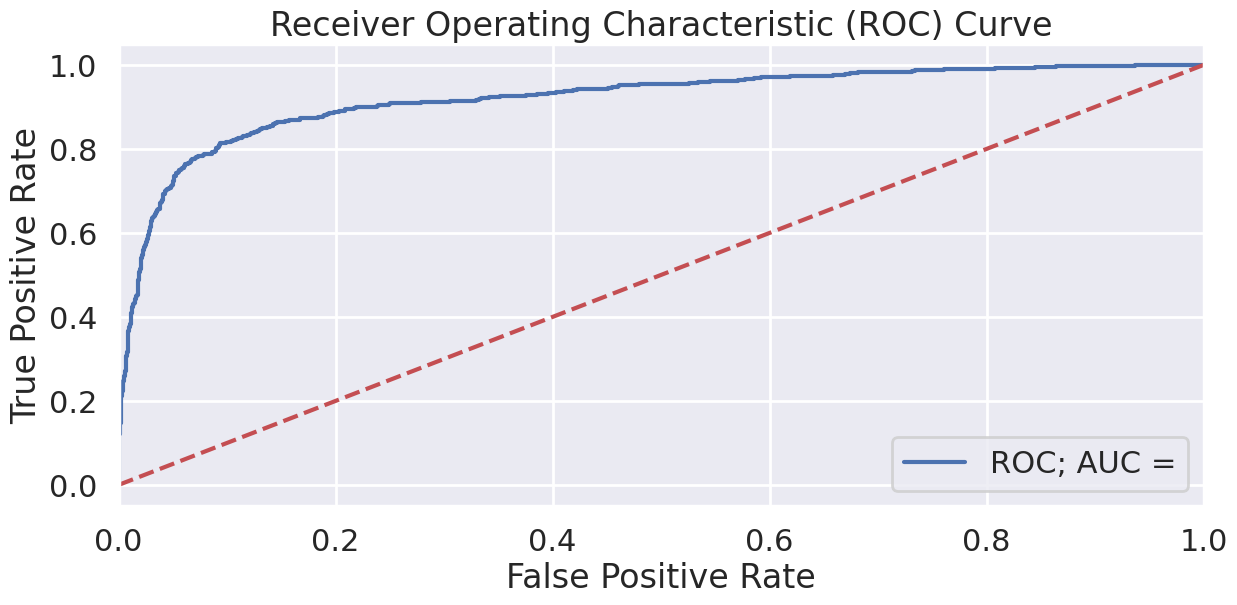

In [ ]:
probs = predictor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(14,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'ROC; AUC =' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Kfold target encoding: https://github.com/pourya-ir/Medium/blob/master/K-fold-target-enc/K-fold-Target-Encoding.ipynb


Coursera Algorithms course: https://www.coursera.org/specializations/algorithms
Also read on Python Data Structires (easy)

# Graphs

In [ ]:
# train_data[numerical_cols].dtypes

id                              int64
person_age                      int64
person_income                   int64
person_emp_length             float64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

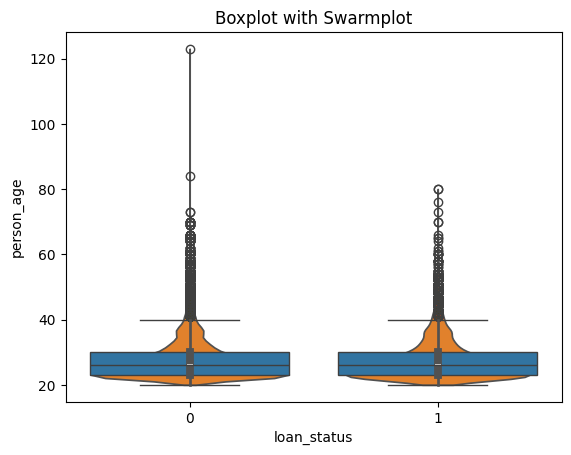

In [ ]:
# Plots boxplot
sns.boxplot(x='loan_status', y='person_age', data=train_data)
# Overlays swarm plot over boxplot
#sns.swarmplot(x='loan_status', y='person_age', data=train_data, color='black', alpha=0.5)
# swarm plot takes ages to generate - try the violin plot
sns.violinplot(x="loan_status", y="person_age",  data=train_data, cut = 0)
plt.title('Boxplot with Swarmplot')
plt.show()

<Axes: xlabel='loan_status', ylabel='person_age'>

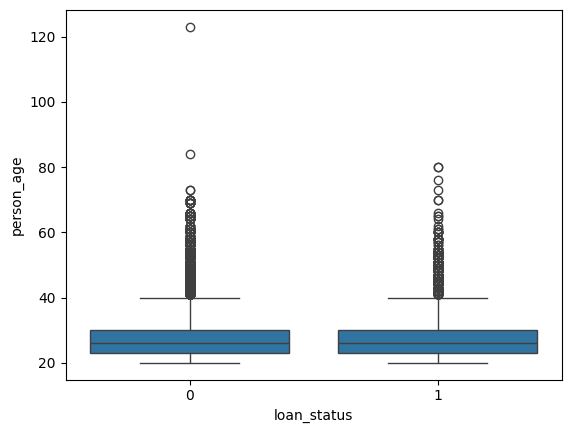

In [ ]:
# # just the boxplot
# sns.boxplot(x='loan_status', y='person_age', data=train_data)


<Axes: xlabel='person_age', ylabel='Count'>

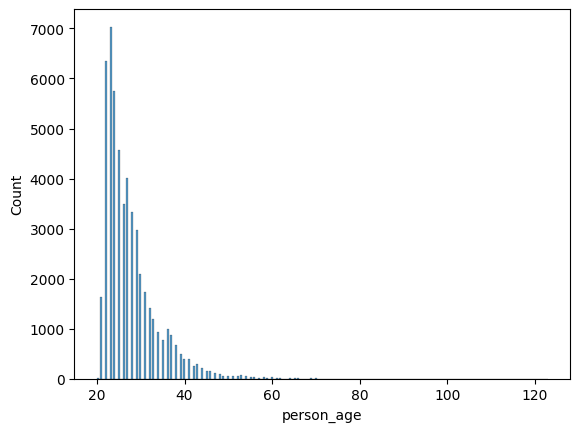

In [ ]:
# # univariate - histogram
# sns.histplot(data=train_data, x="person_age")

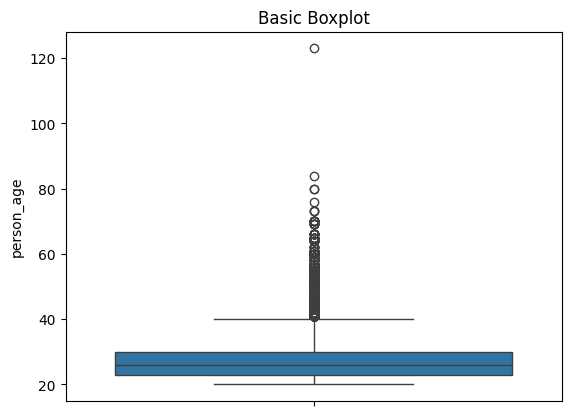

In [ ]:
# # univariate - box plot with swarm plot# Creates a basic boxplot
# sns.boxplot(data=train_data['person_age'])
# # adds swarm plot univariate
# #sns.swarmplot(data=train_data['person_age'], color='black', alpha=0.5)
# # Adds title to the boxplot
# plt.title('Basic Boxplot')
# plt.show()

In [ ]:
# working through this notebook:
#- https://www.kaggle.com/code/cdeotte/feature-engineering-with-rapids-lb-38-847
# my working out: -https://www.kaggle.com/code/cdeotte/feature-engineering-with-rapids-lb-38-847

# **SUMMARY OF RESULTS FOR DIFFERENT PREPROCESSING WAYS - XGBOOST ONLY**

## 1. No preprocessing, only the 'identifier' column was deleted from the feature space




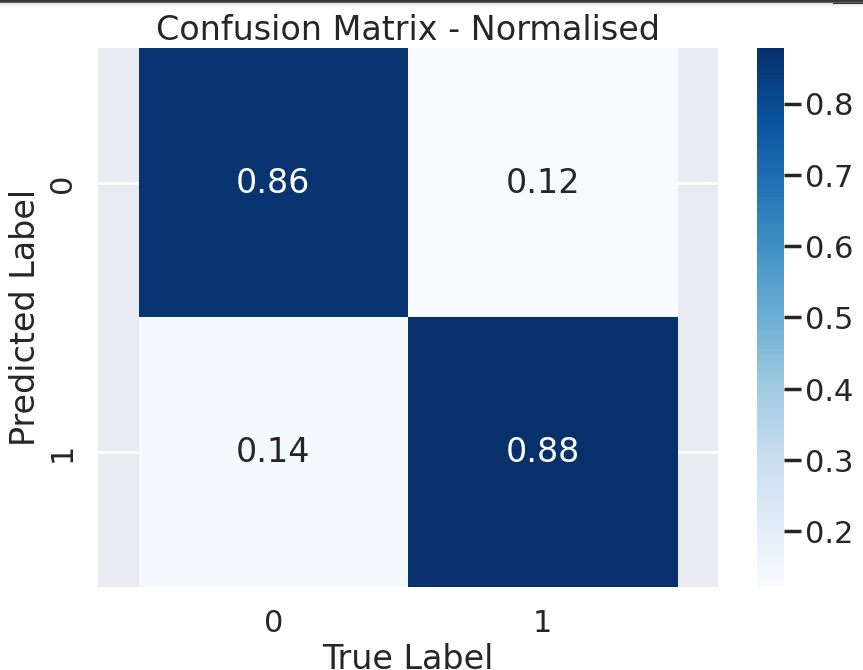

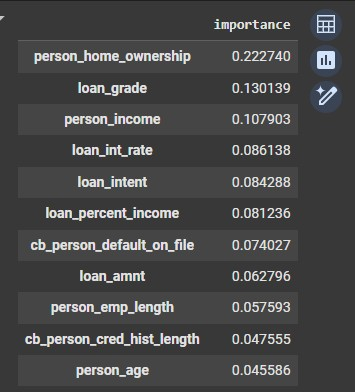

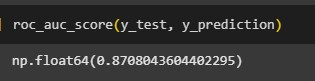

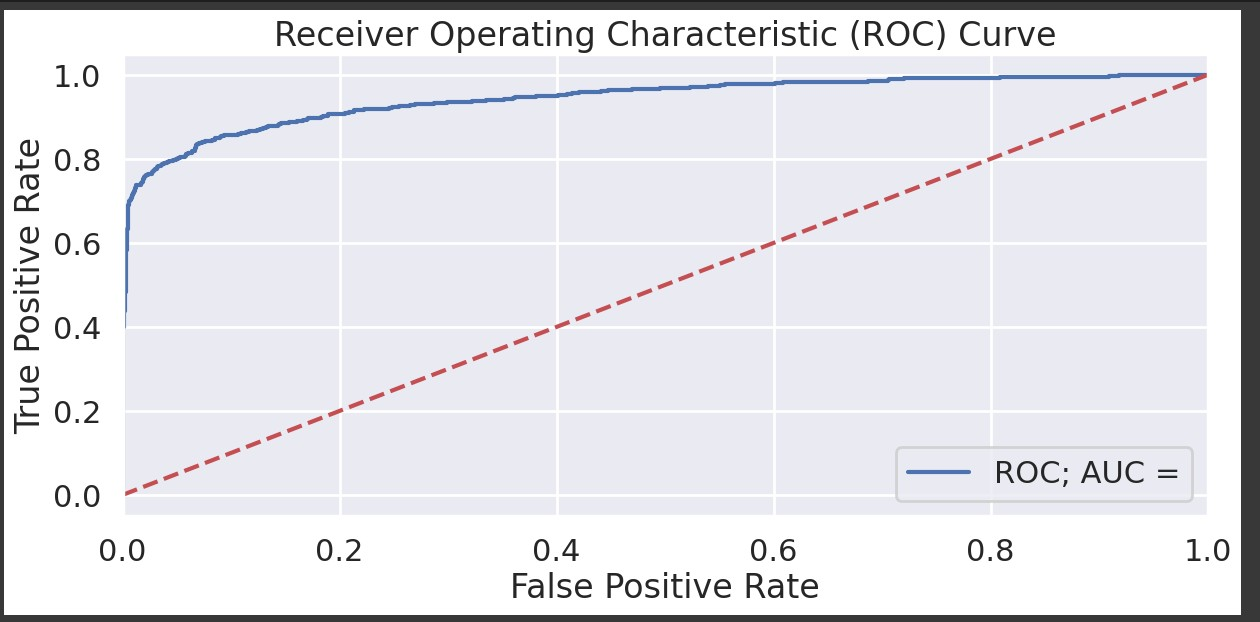

# 2. Log-transforming the numerical columns (all of them)

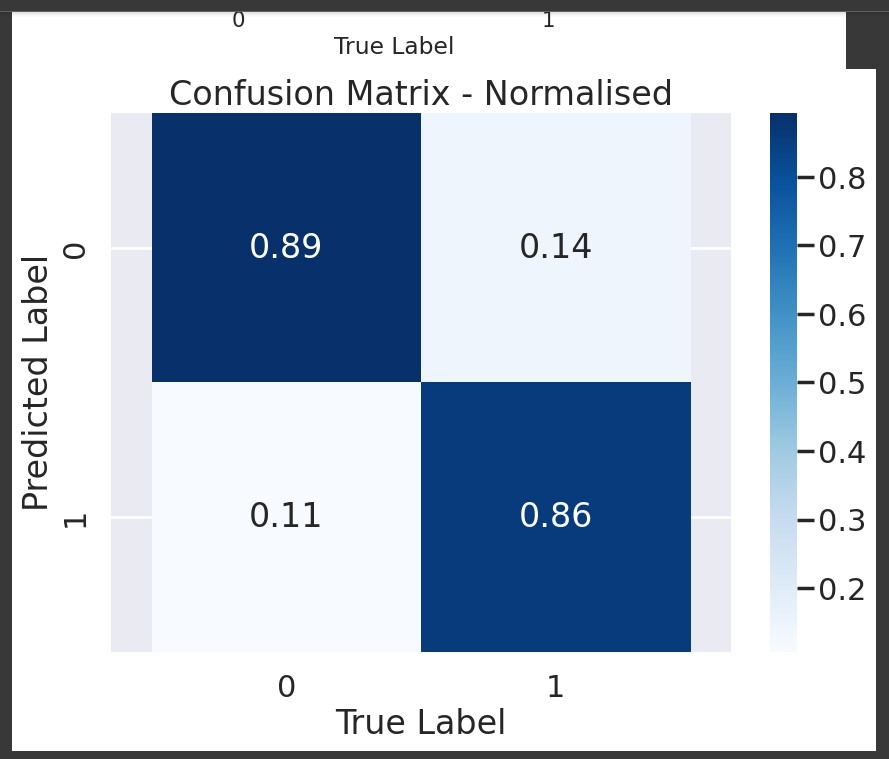

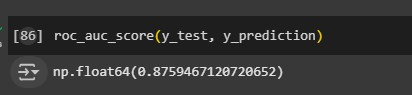

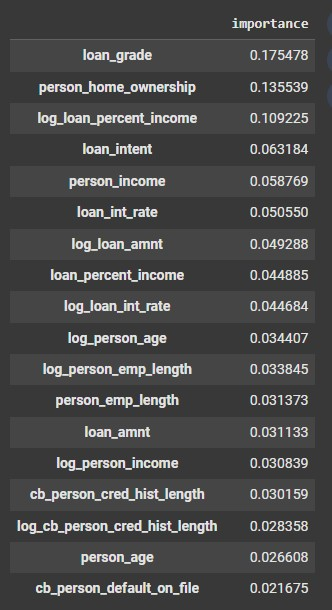

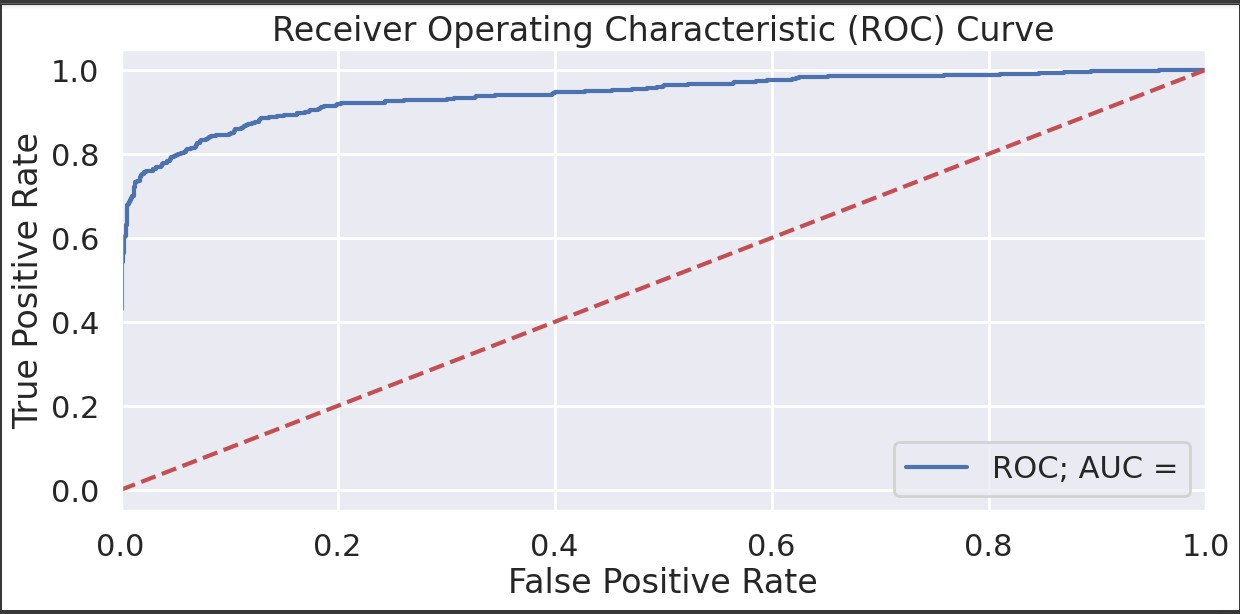

# 3. Ordinal and One-Hot Encoding of Categorical features

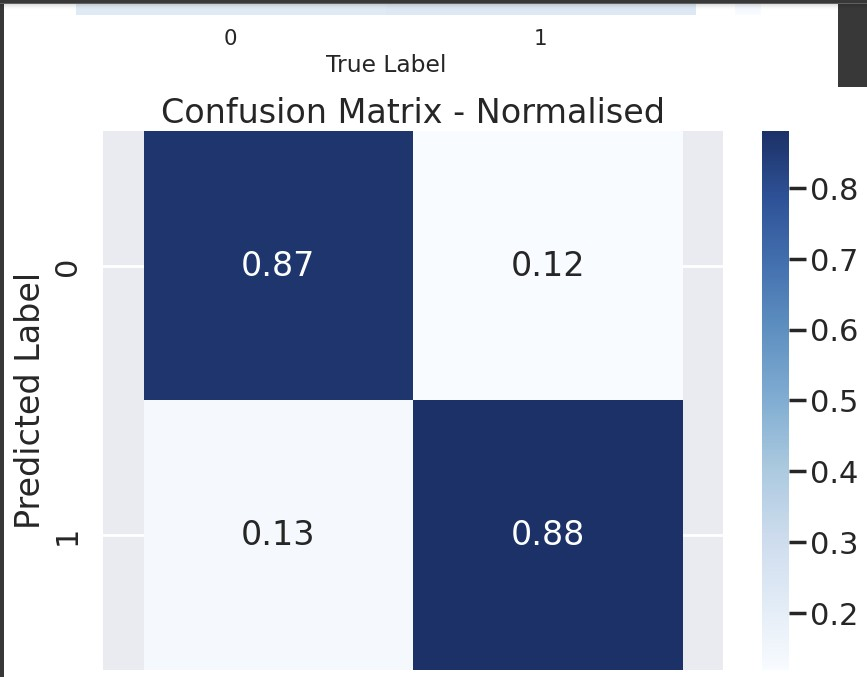

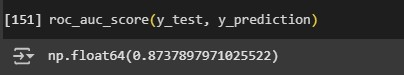

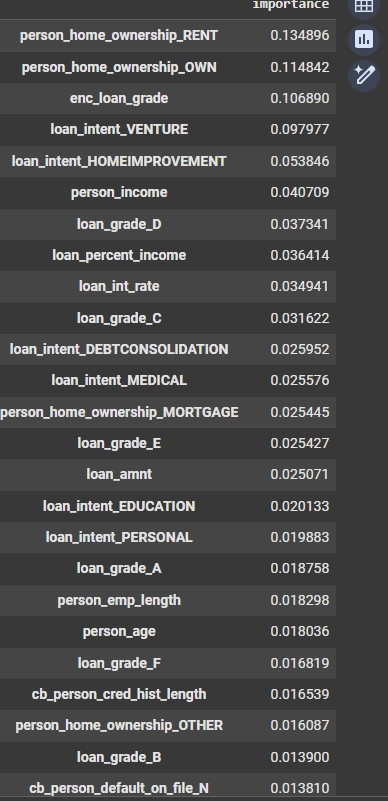

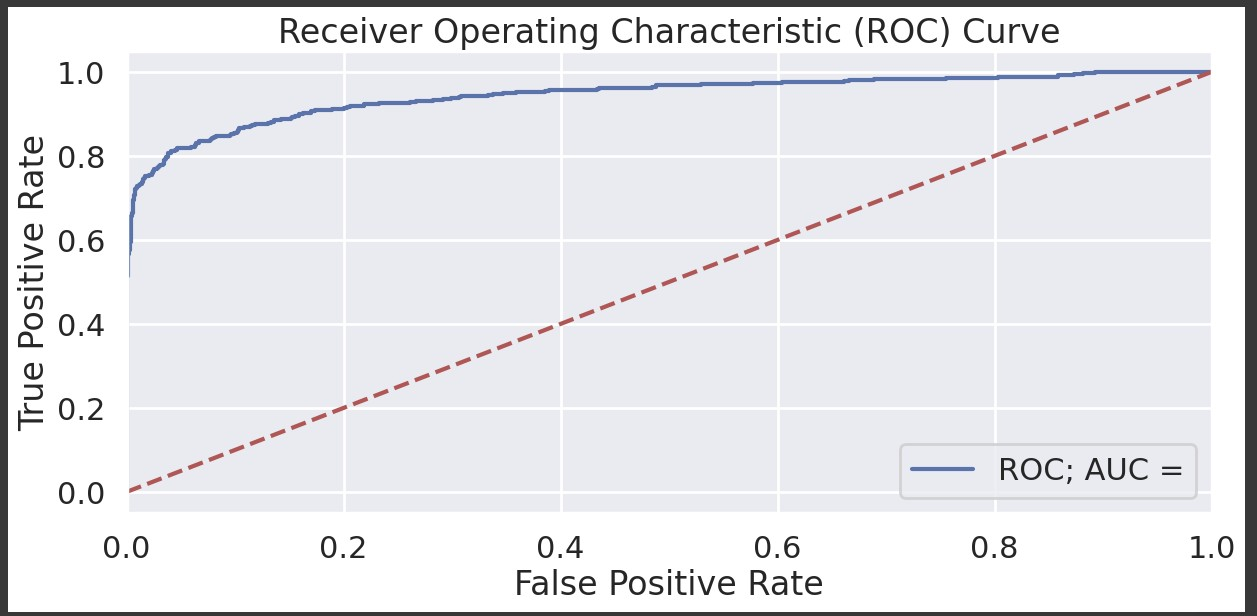

# 4. Features Engineering Chris Deotte no.1 - combining categorical features with numerical features (sum)

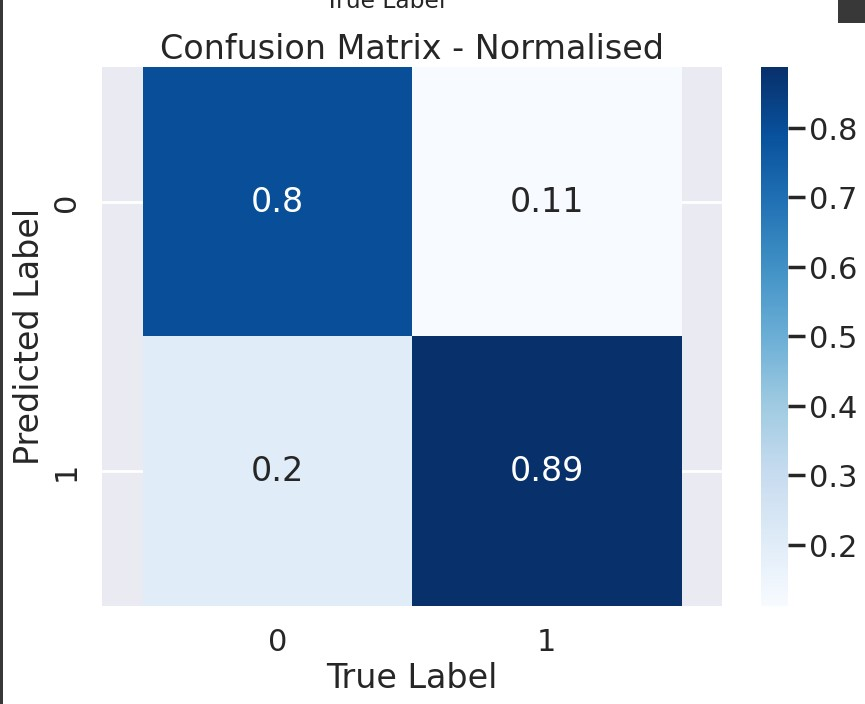

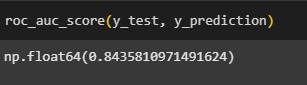

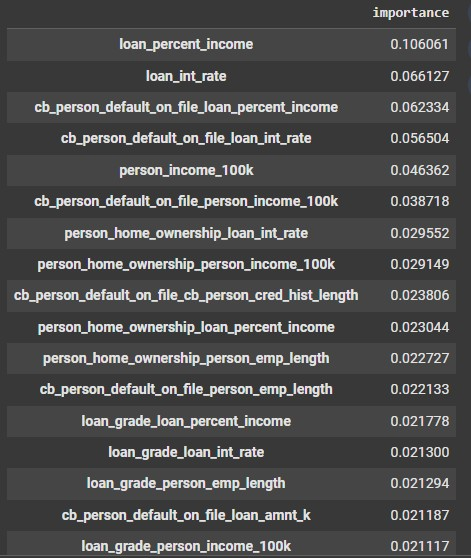

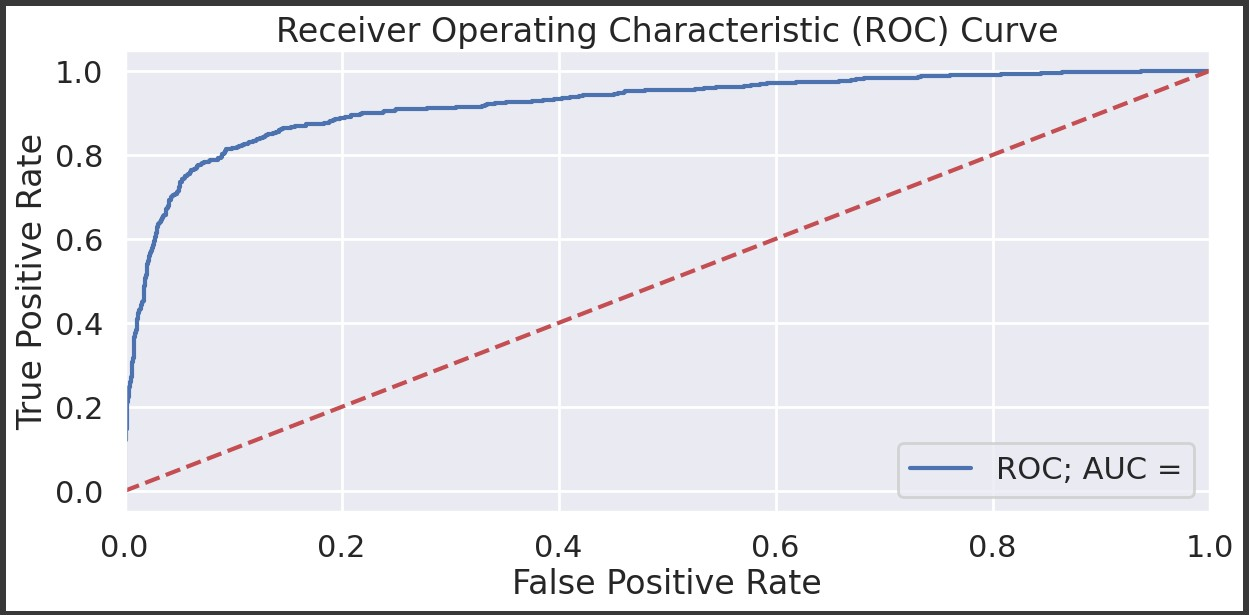